In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt_tab to C:\Users\Karen
[nltk_data]     Fernandes\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Karen Fernandes\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     C:\Users\Karen Fernandes\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!
[nltk_data] Downloading package words to C:\Users\Karen
[nltk_data]     Fernandes\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\Karen
[nltk_data]     Fernandes\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
products = pd.read_csv(r'C:\Users\Karen Fernandes\anaconda3\Files\Amazon API\cleaned_pbc_dataset.csv')
products.head(1)

,Unnamed: 0,asin,product_title,price,product_star_rating,ratings,url,photo,offers,minimum_offer_price,is_best_seller,is_amazon_choice,is_prime,climate_pledge_friendly,sales_volume_in_past_month,has_variations,delivery_category
0,0,B0D9LL8LK7,Ailun 3 Pack Screen Protector for iPhone 16 Pr...,5.98,4.5,32895,https://www.amazon.com/dp/B0D9LL8LK7,https://m.media-amazon.com/images/I/71Biao08Iy...,1,5.98,False,False,True,False,0.0,False,Free delivery with minimum order


In [3]:
reviews = pd.read_csv(r'C:\Users\Karen Fernandes\anaconda3\Files\Amazon API\cleaned_reviews_dataset.csv')
reviews.head(1)

,Unnamed: 0,review_id,review_title,comment,review_star_rating,link,author,author_avatar,is_verified_purchase,product_asin,helpful_vote_count,date,location
0,0,R38JSEBNI0WJOF,Super Happy!,I recently purchased this iPhone 12 screen pro...,5,https://www.amazon.com/gp/customer-reviews/R38...,Summer,https://images-na.ssl-images-amazon.com/images...,True,B08QV9V269,0.0,2024-05-22,United States


In [4]:
df = pd.merge(products, reviews, left_on = 'asin', right_on = 'product_asin', how='right')
df.shape

(861, 30)

## Data Cleaning

In [5]:
df.columns

Index(['Unnamed: 0_x', 'asin', 'product_title', 'price', 'product_star_rating',
       'ratings', 'url', 'photo', 'offers', 'minimum_offer_price',
       'is_best_seller', 'is_amazon_choice', 'is_prime',
       'climate_pledge_friendly', 'sales_volume_in_past_month',
       'has_variations', 'delivery_category', 'Unnamed: 0_y', 'review_id',
       'review_title', 'comment', 'review_star_rating', 'link', 'author',
       'author_avatar', 'is_verified_purchase', 'product_asin',
       'helpful_vote_count', 'date', 'location'],
      dtype='object')

In [6]:
df.drop(columns = {'Unnamed: 0_x', 'Unnamed: 0_y'}, inplace = True)

In [7]:
df1 = df[['asin', 'product_title', 'price', 'product_star_rating', 'ratings', 'is_best_seller', 'is_amazon_choice', 'is_prime', 'climate_pledge_friendly', 'sales_volume_in_past_month', 'has_variations', 'delivery_category', 'review_id', 'review_title', 'comment', 'review_star_rating', 'product_asin', 'date']]

In [8]:
df1.isna().sum()

asin                          255
product_title                 255
price                         255
product_star_rating           255
ratings                       255
is_best_seller                255
is_amazon_choice              255
is_prime                      255
climate_pledge_friendly       255
sales_volume_in_past_month    255
has_variations                255
delivery_category             255
review_id                       0
review_title                    0
comment                         1
review_star_rating              0
product_asin                    0
date                            0
dtype: int64

In [9]:
# Drop rows where all specified columns are empty
df2 = df1.dropna(subset=['comment', 'asin', 'product_title', 'price', 'product_star_rating', 'ratings', 'is_best_seller', 'is_amazon_choice', 'is_prime', 'climate_pledge_friendly', 
                        'sales_volume_in_past_month', 'has_variations', 'delivery_category', 'date'], how='any')

In [10]:
df2.isna().sum()

asin                          0
product_title                 0
price                         0
product_star_rating           0
ratings                       0
is_best_seller                0
is_amazon_choice              0
is_prime                      0
climate_pledge_friendly       0
sales_volume_in_past_month    0
has_variations                0
delivery_category             0
review_id                     0
review_title                  0
comment                       0
review_star_rating            0
product_asin                  0
date                          0
dtype: int64

In [11]:
# Adding a new column 'row_id' with sequential numbers starting from 1
df2['id'] = range(1, len(df2) + 1)

C:\Users\Karen Fernandes\AppData\Local\Temp\ipykernel_11420\1491258878.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['id'] = range(1, len(df2) + 1)


In [12]:
# insert 'row_id' at the first position
df2.insert(0, 'id', df2.pop('id'))

In [13]:
# Reset the index and drop the old index column
df2 = df2.reset_index(drop=True)

## Data Visualization
### Analyzing Rating column

In [14]:
rating = df2['review_star_rating'].value_counts()
rating

review_star_rating
5    504
4     83
3      8
1      7
2      4
Name: count, dtype: int64

In [15]:
# chart style
sns.set_style('darkgrid')

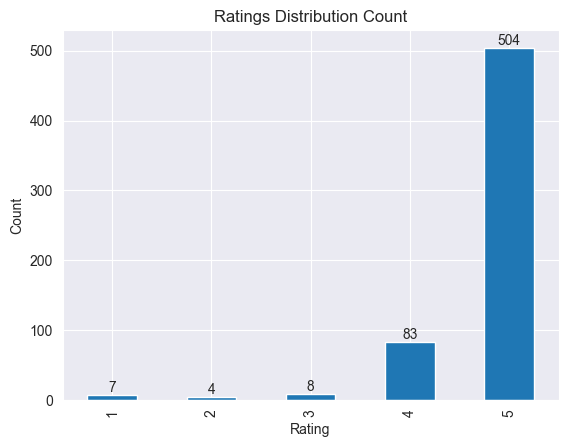

In [16]:
df2['review_star_rating'].value_counts().sort_index().plot(kind = 'bar')
plt.title('Ratings Distribution Count')
plt.xlabel('Rating')
plt.ylabel('Count')

# Get the current Axes
ax = plt.gca()

# Loop through the bars and add annotations
for patch in ax.patches:
    # Get the height of each bar
    height = patch.get_height()
    # Annotate the height (count) above the bar
    plt.text(patch.get_x() + patch.get_width() / 2., height, int(height), ha='center', va='bottom')
    
plt.show()

## Basic NLTK

In [17]:
# exploring the comment column
example = df2['comment'][5]
example

"The Apple AirTag has been a game-changer for me as a dog owner. I use it to keep track of my dog's location, and it has provided me with incredible peace of mind. The AirTag is small and lightweight, so it easily attaches to my dog's collar without causing any discomfort.\n\nWhat I love most about the AirTag is its accuracy and reliability. The Find My app on my iPhone lets me see exactly where my dog is at all times. If he ever wanders off, I can quickly locate him, which is especially reassuring during walks in unfamiliar areas or when visiting busy parks.\n\nAnother fantastic feature is the Precision Finding, which helps me pinpoint his location down to the exact spot. The AirTag even plays a sound to help me find him if he's hiding nearby. Plus, with the vast network of Apple devices, even if he gets far away, the AirTag can still be tracked by other iPhones in the area.\n\nOverall, the AirTag has become an essential tool in keeping my dog safe. I highly recommend it to any pet ow

In [18]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['The',
 'Apple',
 'AirTag',
 'has',
 'been',
 'a',
 'game-changer',
 'for',
 'me',
 'as']

In [19]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('The', 'DT'),
 ('Apple', 'NNP'),
 ('AirTag', 'NNP'),
 ('has', 'VBZ'),
 ('been', 'VBN'),
 ('a', 'DT'),
 ('game-changer', 'NN'),
 ('for', 'IN'),
 ('me', 'PRP'),
 ('as', 'IN')]

In [20]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  The/DT
  (ORGANIZATION Apple/NNP)
  AirTag/NNP
  has/VBZ
  been/VBN
  a/DT
  game-changer/NN
  for/IN
  me/PRP
  as/IN
  a/DT
  dog/NN
  owner/NN
  ./.
  I/PRP
  use/VBP
  it/PRP
  to/TO
  keep/VB
  track/NN
  of/IN
  my/PRP$
  dog/NN
  's/POS
  location/NN
  ,/,
  and/CC
  it/PRP
  has/VBZ
  provided/VBN
  me/PRP
  with/IN
  incredible/JJ
  peace/NN
  of/IN
  mind/NN
  ./.
  The/DT
  (ORGANIZATION AirTag/NNP)
  is/VBZ
  small/JJ
  and/CC
  lightweight/JJ
  ,/,
  so/IN
  it/PRP
  easily/RB
  attaches/VBZ
  to/TO
  my/PRP$
  dog/NN
  's/POS
  collar/NN
  without/IN
  causing/VBG
  any/DT
  discomfort/NN
  ./.
  What/WP
  I/PRP
  love/VBP
  most/RBS
  about/IN
  the/DT
  (ORGANIZATION AirTag/NNP)
  is/VBZ
  its/PRP$
  accuracy/NN
  and/CC
  reliability/NN
  ./.
  The/DT
  (ORGANIZATION Find/NNP My/NNP)
  app/NN
  on/IN
  my/PRP$
  (ORGANIZATION iPhone/NN)
  lets/VBZ
  me/PRP
  see/VB
  exactly/RB
  where/WRB
  my/PRP$
  dog/NN
  is/VBZ
  at/IN
  all/DT
  times/NNS
  ./.
  If/IN
  he

### Step 1. VADER Sentiment Scoring

In [21]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
from tqdm import tqdm

sia = SentimentIntensityAnalyzer()

In [22]:
sia.polarity_scores('I am soo happy!')

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6114}

In [23]:
sia.polarity_scores('This is bleh!')

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [24]:
sia.polarity_scores('Cant believe it, its awful')

{'neg': 0.429, 'neu': 0.571, 'pos': 0.0, 'compound': -0.4588}

In [25]:
sia.polarity_scores(example)

{'neg': 0.01, 'neu': 0.805, 'pos': 0.185, 'compound': 0.9881}

In [26]:
# run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df2.iterrows(), total=len(df2)):
    text = row['comment']
    myid = row['id']
    res[myid] = sia.polarity_scores(text)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 606/606 [00:00<00:00, 1860.14it/s]


In [27]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns = {'index': 'id'})
vaders = pd.merge(vaders, df2, how = 'left')
vaders.head()

,id,neg,neu,pos,compound,asin,product_title,price,product_star_rating,ratings,...,climate_pledge_friendly,sales_volume_in_past_month,has_variations,delivery_category,review_id,review_title,comment,review_star_rating,product_asin,date
0,1,0.000,0.888,0.112,0.4404,B0CWXNS552,Apple AirTag,24.98,4.6,8301.0,...,False,10000.0,False,Free delivery with minimum order,R3G2Z3N95Z9PVN,Excellent product!,These have been a life saver for keeping up wi...,5,B0CWXNS552,2024-09-06
1,2,0.023,0.869,0.108,0.9657,B0CWXNS552,Apple AirTag,24.98,4.6,8301.0,...,False,10000.0,False,Free delivery with minimum order,RWMO0SCFDLH2U,AirTags are awesome...but beware...they will m...,I've been using AirTags for a couple of years ...,5,B0CWXNS552,2024-08-27
2,3,0.000,0.782,0.218,0.7717,B0CWXNS552,Apple AirTag,24.98,4.6,8301.0,...,False,10000.0,False,Free delivery with minimum order,R3GVGOVQIS07A3,Wish I'd Bought One Long Ago,I loved being able to know where my luggage wa...,5,B0CWXNS552,2024-09-02
3,4,0.034,0.888,0.078,0.4404,B0CWXNS552,Apple AirTag,24.98,4.6,8301.0,...,False,10000.0,False,Free delivery with minimum order,R16FKE7NDKWJK7,Great value,Typical high quality product from Apple. Simpl...,5,B0CWXNS552,2024-08-22
4,5,0.037,0.578,0.385,0.9670,B0CWXNS552,Apple AirTag,24.98,4.6,8301.0,...,False,10000.0,False,Free delivery with minimum order,R241JDC5QO2IVK,Great product,Great product to have on things that can get l...,5,B0CWXNS552,2024-08-24


#### Plot Vader Results

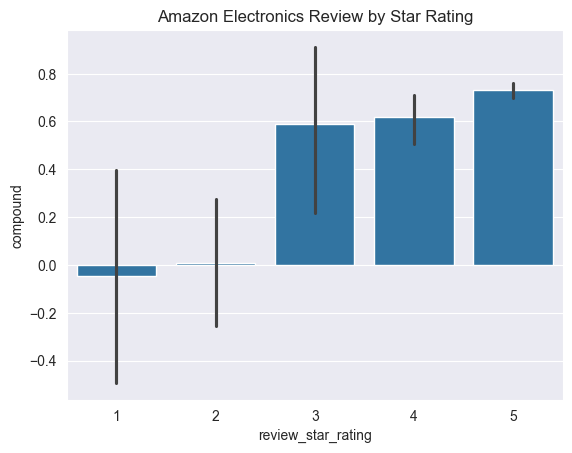

In [28]:
ax = sns.barplot(data = vaders, x = 'review_star_rating', y = 'compound')
ax.set_title('Amazon Electronics Review by Star Rating')
plt.show()

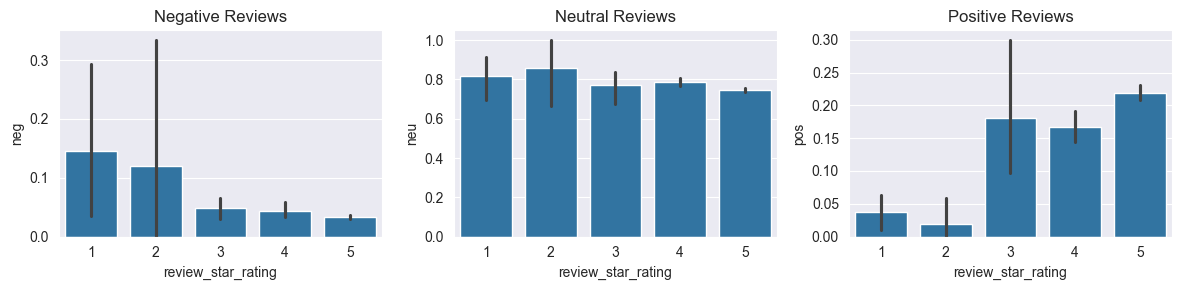

In [29]:
fig, axs = plt.subplots(1, 3, figsize = (12, 3))
sns.barplot(data = vaders, x = 'review_star_rating', y = 'neg', ax = axs[0])
sns.barplot(data = vaders, x = 'review_star_rating', y = 'neu', ax = axs[1])
sns.barplot(data = vaders, x = 'review_star_rating', y = 'pos', ax = axs[2])
axs[0].set_title('Negative Reviews')
axs[1].set_title('Neutral Reviews')
axs[2].set_title('Positive Reviews')
plt.tight_layout()
plt.show()

### Step 2. Roberta Pretrained Model

In [30]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
import torch

In [31]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL, use_fast=True)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

C:\Users\Karen Fernandes\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [32]:
# VADER results on example
print(example)
sia.polarity_scores(example)

The Apple AirTag has been a game-changer for me as a dog owner. I use it to keep track of my dog's location, and it has provided me with incredible peace of mind. The AirTag is small and lightweight, so it easily attaches to my dog's collar without causing any discomfort.

What I love most about the AirTag is its accuracy and reliability. The Find My app on my iPhone lets me see exactly where my dog is at all times. If he ever wanders off, I can quickly locate him, which is especially reassuring during walks in unfamiliar areas or when visiting busy parks.

Another fantastic feature is the Precision Finding, which helps me pinpoint his location down to the exact spot. The AirTag even plays a sound to help me find him if he's hiding nearby. Plus, with the vast network of Apple devices, even if he gets far away, the AirTag can still be tracked by other iPhones in the area.

Overall, the AirTag has become an essential tool in keeping my dog safe. I highly recommend it to any pet owner who

{'neg': 0.01, 'neu': 0.805, 'pos': 0.185, 'compound': 0.9881}

In [33]:
# run for roberta model
encoded_text = tokenizer(example, return_tensors = 'pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg': scores[0],
    'roberta_neu': scores[1],
    'roberta_pos': scores[2]
}
print(scores_dict)

{'roberta_neg': np.float32(0.0030775093), 'roberta_neu': np.float32(0.02909274), 'roberta_pos': np.float32(0.9678297)}


In [34]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, max_length = 512, truncation=True, padding = 'max_length', return_tensors = 'pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
         'roberta_neg': scores[0],
         'roberta_neu': scores[1],
         'roberta_pos': scores[2]
     }
    return scores_dict

In [35]:
for i, row in tqdm(df2.iterrows(), total=len(df2)):
    try:
        text = row['comment']
        myid = row['id']
        print(f'Processing id {myid} with comment length {len(text)}')  # Debug line
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError as e:
        print(f'Broke for id {myid}: {e}')
    except Exception as e:
        print(f'Unexpected error for id {myid}: {e}')

  0%|                                                                                                                              | 0/606 [00:00<?, ?it/s]

Processing id 1 with comment length 142


  0%|▏                                                                                                                     | 1/606 [00:00<05:07,  1.97it/s]

Processing id 2 with comment length 1169


  0%|▍                                                                                                                     | 2/606 [00:01<05:45,  1.75it/s]

Processing id 3 with comment length 159


  0%|▌                                                                                                                     | 3/606 [00:02<07:50,  1.28it/s]

Processing id 4 with comment length 364


  1%|▊                                                                                                                     | 4/606 [00:03<08:51,  1.13it/s]

Processing id 5 with comment length 235


  1%|▉                                                                                                                     | 5/606 [00:04<10:23,  1.04s/it]

Processing id 6 with comment length 1073


  1%|█▏                                                                                                                    | 6/606 [00:05<11:24,  1.14s/it]

Processing id 7 with comment length 196


  1%|█▎                                                                                                                    | 7/606 [00:07<11:58,  1.20s/it]

Processing id 8 with comment length 288


  1%|█▌                                                                                                                    | 8/606 [00:08<12:23,  1.24s/it]

Processing id 9 with comment length 796


  1%|█▊                                                                                                                    | 9/606 [00:09<12:32,  1.26s/it]

Processing id 10 with comment length 1925


  2%|█▉                                                                                                                   | 10/606 [00:11<12:52,  1.30s/it]

Processing id 11 with comment length 702


  2%|██                                                                                                                   | 11/606 [00:12<12:40,  1.28s/it]

Processing id 12 with comment length 629


  2%|██▎                                                                                                                  | 12/606 [00:13<12:34,  1.27s/it]

Processing id 13 with comment length 164


  2%|██▌                                                                                                                  | 13/606 [00:14<12:30,  1.26s/it]

Processing id 14 with comment length 409


  2%|██▋                                                                                                                  | 14/606 [00:16<12:36,  1.28s/it]

Processing id 15 with comment length 545


  2%|██▉                                                                                                                  | 15/606 [00:17<12:39,  1.29s/it]

Processing id 16 with comment length 624


  3%|███                                                                                                                  | 16/606 [00:18<12:43,  1.29s/it]

Processing id 17 with comment length 680


  3%|███▎                                                                                                                 | 17/606 [00:20<13:12,  1.34s/it]

Processing id 18 with comment length 1454


  3%|███▍                                                                                                                 | 18/606 [00:21<13:35,  1.39s/it]

Processing id 19 with comment length 941


  3%|███▋                                                                                                                 | 19/606 [00:23<13:31,  1.38s/it]

Processing id 20 with comment length 814


  3%|███▊                                                                                                                 | 20/606 [00:24<12:43,  1.30s/it]

Processing id 21 with comment length 204


  3%|████                                                                                                                 | 21/606 [00:25<12:17,  1.26s/it]

Processing id 22 with comment length 398


  4%|████▏                                                                                                                | 22/606 [00:26<12:07,  1.25s/it]

Processing id 23 with comment length 101


  4%|████▍                                                                                                                | 23/606 [00:27<11:50,  1.22s/it]

Processing id 24 with comment length 487


  4%|████▋                                                                                                                | 24/606 [00:28<11:31,  1.19s/it]

Processing id 25 with comment length 528


  4%|████▊                                                                                                                | 25/606 [00:29<11:09,  1.15s/it]

Processing id 26 with comment length 46


  4%|█████                                                                                                                | 26/606 [00:31<11:07,  1.15s/it]

Processing id 27 with comment length 81


  4%|█████▏                                                                                                               | 27/606 [00:32<11:03,  1.15s/it]

Processing id 28 with comment length 123


  5%|█████▍                                                                                                               | 28/606 [00:33<11:17,  1.17s/it]

Processing id 29 with comment length 456


  5%|█████▌                                                                                                               | 29/606 [00:34<11:27,  1.19s/it]

Processing id 30 with comment length 258


  5%|█████▊                                                                                                               | 30/606 [00:35<11:30,  1.20s/it]

Processing id 31 with comment length 466


  5%|█████▉                                                                                                               | 31/606 [00:37<12:15,  1.28s/it]

Processing id 32 with comment length 341


  5%|██████▏                                                                                                              | 32/606 [00:38<12:28,  1.30s/it]

Processing id 33 with comment length 54


  5%|██████▎                                                                                                              | 33/606 [00:40<12:24,  1.30s/it]

Processing id 34 with comment length 233


  6%|██████▌                                                                                                              | 34/606 [00:41<12:25,  1.30s/it]

Processing id 35 with comment length 213


  6%|██████▊                                                                                                              | 35/606 [00:42<12:30,  1.31s/it]

Processing id 36 with comment length 123


  6%|██████▉                                                                                                              | 36/606 [00:44<12:38,  1.33s/it]

Processing id 37 with comment length 179


  6%|███████▏                                                                                                             | 37/606 [00:45<12:26,  1.31s/it]

Processing id 38 with comment length 228


  6%|███████▎                                                                                                             | 38/606 [00:46<12:23,  1.31s/it]

Processing id 39 with comment length 609


  6%|███████▌                                                                                                             | 39/606 [00:47<12:20,  1.31s/it]

Processing id 40 with comment length 415


  7%|███████▋                                                                                                             | 40/606 [00:49<12:25,  1.32s/it]

Processing id 41 with comment length 636


  7%|███████▉                                                                                                             | 41/606 [00:50<12:29,  1.33s/it]

Processing id 42 with comment length 953


  7%|████████                                                                                                             | 42/606 [00:52<12:49,  1.36s/it]

Processing id 43 with comment length 108


  7%|████████▎                                                                                                            | 43/606 [00:53<12:37,  1.34s/it]

Processing id 44 with comment length 179


  7%|████████▍                                                                                                            | 44/606 [00:54<12:53,  1.38s/it]

Processing id 45 with comment length 257


  7%|████████▋                                                                                                            | 45/606 [00:56<12:50,  1.37s/it]

Processing id 46 with comment length 241


  8%|████████▉                                                                                                            | 46/606 [00:57<12:34,  1.35s/it]

Processing id 47 with comment length 194


  8%|█████████                                                                                                            | 47/606 [00:58<12:24,  1.33s/it]

Processing id 48 with comment length 1102


  8%|█████████▎                                                                                                           | 48/606 [01:00<12:32,  1.35s/it]

Processing id 49 with comment length 314


  8%|█████████▍                                                                                                           | 49/606 [01:01<12:14,  1.32s/it]

Processing id 50 with comment length 465


  8%|█████████▋                                                                                                           | 50/606 [01:02<12:04,  1.30s/it]

Processing id 51 with comment length 396


  8%|█████████▊                                                                                                           | 51/606 [01:03<11:49,  1.28s/it]

Processing id 52 with comment length 501


  9%|██████████                                                                                                           | 52/606 [01:05<11:51,  1.28s/it]

Processing id 53 with comment length 227


  9%|██████████▏                                                                                                          | 53/606 [01:06<11:49,  1.28s/it]

Processing id 54 with comment length 158


  9%|██████████▍                                                                                                          | 54/606 [01:07<11:36,  1.26s/it]

Processing id 55 with comment length 144


  9%|██████████▌                                                                                                          | 55/606 [01:08<11:27,  1.25s/it]

Processing id 56 with comment length 830


  9%|██████████▊                                                                                                          | 56/606 [01:10<11:32,  1.26s/it]

Processing id 57 with comment length 915


  9%|███████████                                                                                                          | 57/606 [01:11<11:28,  1.25s/it]

Processing id 58 with comment length 423


 10%|███████████▏                                                                                                         | 58/606 [01:12<11:37,  1.27s/it]

Processing id 59 with comment length 1531


 10%|███████████▍                                                                                                         | 59/606 [01:14<11:56,  1.31s/it]

Processing id 60 with comment length 380


 10%|███████████▌                                                                                                         | 60/606 [01:15<11:47,  1.30s/it]

Processing id 61 with comment length 191


 10%|███████████▊                                                                                                         | 61/606 [01:16<12:01,  1.32s/it]

Processing id 62 with comment length 463


 10%|███████████▉                                                                                                         | 62/606 [01:18<11:41,  1.29s/it]

Processing id 63 with comment length 319


 10%|████████████▏                                                                                                        | 63/606 [01:19<11:30,  1.27s/it]

Processing id 64 with comment length 302


 11%|████████████▎                                                                                                        | 64/606 [01:20<11:14,  1.24s/it]

Processing id 65 with comment length 119


 11%|████████████▌                                                                                                        | 65/606 [01:21<11:05,  1.23s/it]

Processing id 66 with comment length 87


 11%|████████████▋                                                                                                        | 66/606 [01:22<11:08,  1.24s/it]

Processing id 67 with comment length 74


 11%|████████████▉                                                                                                        | 67/606 [01:24<11:57,  1.33s/it]

Processing id 68 with comment length 978


 11%|█████████████▏                                                                                                       | 68/606 [01:25<11:59,  1.34s/it]

Processing id 69 with comment length 152


 11%|█████████████▎                                                                                                       | 69/606 [01:27<11:45,  1.31s/it]

Processing id 70 with comment length 276


 12%|█████████████▌                                                                                                       | 70/606 [01:28<11:33,  1.29s/it]

Processing id 71 with comment length 964


 12%|█████████████▋                                                                                                       | 71/606 [01:29<11:29,  1.29s/it]

Processing id 72 with comment length 804


 12%|█████████████▉                                                                                                       | 72/606 [01:30<11:18,  1.27s/it]

Processing id 73 with comment length 256


 12%|██████████████                                                                                                       | 73/606 [01:32<11:04,  1.25s/it]

Processing id 74 with comment length 190


 12%|██████████████▎                                                                                                      | 74/606 [01:33<11:02,  1.24s/it]

Processing id 75 with comment length 135


 12%|██████████████▍                                                                                                      | 75/606 [01:34<10:51,  1.23s/it]

Processing id 76 with comment length 252


 13%|██████████████▋                                                                                                      | 76/606 [01:35<10:38,  1.20s/it]

Processing id 77 with comment length 735


 13%|██████████████▊                                                                                                      | 77/606 [01:36<10:39,  1.21s/it]

Processing id 78 with comment length 732


 13%|███████████████                                                                                                      | 78/606 [01:38<11:38,  1.32s/it]

Processing id 79 with comment length 1181


 13%|███████████████▎                                                                                                     | 79/606 [01:39<11:48,  1.35s/it]

Processing id 80 with comment length 209


 13%|███████████████▍                                                                                                     | 80/606 [01:41<11:40,  1.33s/it]

Processing id 81 with comment length 165


 13%|███████████████▋                                                                                                     | 81/606 [01:42<12:09,  1.39s/it]

Processing id 82 with comment length 143


 14%|███████████████▊                                                                                                     | 82/606 [01:43<11:38,  1.33s/it]

Processing id 83 with comment length 226


 14%|████████████████                                                                                                     | 83/606 [01:45<11:28,  1.32s/it]

Processing id 84 with comment length 221


 14%|████████████████▏                                                                                                    | 84/606 [01:46<11:06,  1.28s/it]

Processing id 85 with comment length 339


 14%|████████████████▍                                                                                                    | 85/606 [01:47<10:46,  1.24s/it]

Processing id 86 with comment length 136


 14%|████████████████▌                                                                                                    | 86/606 [01:48<10:40,  1.23s/it]

Processing id 87 with comment length 121


 14%|████████████████▊                                                                                                    | 87/606 [01:49<10:45,  1.24s/it]

Processing id 88 with comment length 651


 15%|████████████████▉                                                                                                    | 88/606 [01:51<10:59,  1.27s/it]

Processing id 89 with comment length 248


 15%|█████████████████▏                                                                                                   | 89/606 [01:52<11:02,  1.28s/it]

Processing id 90 with comment length 413


 15%|█████████████████▍                                                                                                   | 90/606 [01:53<10:54,  1.27s/it]

Processing id 91 with comment length 123


 15%|█████████████████▌                                                                                                   | 91/606 [01:55<10:53,  1.27s/it]

Processing id 92 with comment length 279


 15%|█████████████████▊                                                                                                   | 92/606 [01:56<10:49,  1.26s/it]

Processing id 93 with comment length 415


 15%|█████████████████▉                                                                                                   | 93/606 [01:57<10:49,  1.27s/it]

Processing id 94 with comment length 507


 16%|██████████████████▏                                                                                                  | 94/606 [01:58<10:43,  1.26s/it]

Processing id 95 with comment length 317


 16%|██████████████████▎                                                                                                  | 95/606 [02:00<10:45,  1.26s/it]

Processing id 96 with comment length 427


 16%|██████████████████▌                                                                                                  | 96/606 [02:01<10:35,  1.25s/it]

Processing id 97 with comment length 408


 16%|██████████████████▋                                                                                                  | 97/606 [02:02<10:30,  1.24s/it]

Processing id 98 with comment length 482


 16%|██████████████████▉                                                                                                  | 98/606 [02:03<10:27,  1.23s/it]

Processing id 99 with comment length 189


 16%|███████████████████                                                                                                  | 99/606 [02:04<10:22,  1.23s/it]

Processing id 100 with comment length 1630


 17%|███████████████████▏                                                                                                | 100/606 [02:06<10:36,  1.26s/it]

Processing id 101 with comment length 238


 17%|███████████████████▎                                                                                                | 101/606 [02:07<10:35,  1.26s/it]

Processing id 102 with comment length 513


 17%|███████████████████▌                                                                                                | 102/606 [02:08<10:33,  1.26s/it]

Processing id 103 with comment length 1120


 17%|███████████████████▋                                                                                                | 103/606 [02:10<10:39,  1.27s/it]

Processing id 104 with comment length 521


 17%|███████████████████▉                                                                                                | 104/606 [02:11<10:31,  1.26s/it]

Processing id 105 with comment length 1107


 17%|████████████████████                                                                                                | 105/606 [02:12<10:39,  1.28s/it]

Processing id 106 with comment length 331


 17%|████████████████████▎                                                                                               | 106/606 [02:13<10:27,  1.25s/it]

Processing id 107 with comment length 396


 18%|████████████████████▍                                                                                               | 107/606 [02:15<10:23,  1.25s/it]

Processing id 108 with comment length 460


 18%|████████████████████▋                                                                                               | 108/606 [02:16<10:15,  1.24s/it]

Processing id 109 with comment length 1663


 18%|████████████████████▊                                                                                               | 109/606 [02:17<10:16,  1.24s/it]

Processing id 110 with comment length 522


 18%|█████████████████████                                                                                               | 110/606 [02:18<10:10,  1.23s/it]

Processing id 111 with comment length 776


 18%|█████████████████████▏                                                                                              | 111/606 [02:20<10:17,  1.25s/it]

Processing id 112 with comment length 236


 18%|█████████████████████▍                                                                                              | 112/606 [02:21<10:11,  1.24s/it]

Processing id 113 with comment length 201


 19%|█████████████████████▋                                                                                              | 113/606 [02:22<10:05,  1.23s/it]

Processing id 114 with comment length 1562


 19%|█████████████████████▊                                                                                              | 114/606 [02:23<10:16,  1.25s/it]

Processing id 115 with comment length 2270


 19%|██████████████████████                                                                                              | 115/606 [02:25<10:37,  1.30s/it]

Processing id 116 with comment length 1650


 19%|██████████████████████▏                                                                                             | 116/606 [02:26<10:36,  1.30s/it]

Processing id 117 with comment length 3069


 19%|██████████████████████▍                                                                                             | 117/606 [02:27<10:53,  1.34s/it]

Processing id 118 with comment length 2243


 19%|██████████████████████▌                                                                                             | 118/606 [02:29<11:01,  1.36s/it]

Processing id 119 with comment length 1263


 20%|██████████████████████▊                                                                                             | 119/606 [02:30<10:58,  1.35s/it]

Processing id 120 with comment length 1001


 20%|██████████████████████▉                                                                                             | 120/606 [02:31<10:43,  1.32s/it]

Processing id 121 with comment length 1442


 20%|███████████████████████▏                                                                                            | 121/606 [02:33<10:36,  1.31s/it]

Processing id 122 with comment length 3045


 20%|███████████████████████▎                                                                                            | 122/606 [02:34<10:48,  1.34s/it]

Processing id 123 with comment length 2686


 20%|███████████████████████▌                                                                                            | 123/606 [02:36<11:01,  1.37s/it]

Processing id 124 with comment length 517


 20%|███████████████████████▋                                                                                            | 124/606 [02:37<10:40,  1.33s/it]

Processing id 125 with comment length 483


 21%|███████████████████████▉                                                                                            | 125/606 [02:38<10:26,  1.30s/it]

Processing id 126 with comment length 453


 21%|████████████████████████                                                                                            | 126/606 [02:39<10:17,  1.29s/it]

Processing id 127 with comment length 265


 21%|████████████████████████▎                                                                                           | 127/606 [02:41<10:11,  1.28s/it]

Processing id 128 with comment length 541


 21%|████████████████████████▌                                                                                           | 128/606 [02:42<10:02,  1.26s/it]

Processing id 129 with comment length 297


 21%|████████████████████████▋                                                                                           | 129/606 [02:43<09:56,  1.25s/it]

Processing id 130 with comment length 759


 21%|████████████████████████▉                                                                                           | 130/606 [02:44<09:52,  1.25s/it]

Processing id 131 with comment length 637


 22%|█████████████████████████                                                                                           | 131/606 [02:45<09:47,  1.24s/it]

Processing id 132 with comment length 279


 22%|█████████████████████████▎                                                                                          | 132/606 [02:47<09:46,  1.24s/it]

Processing id 133 with comment length 63


 22%|█████████████████████████▍                                                                                          | 133/606 [02:48<09:46,  1.24s/it]

Processing id 134 with comment length 79


 22%|█████████████████████████▋                                                                                          | 134/606 [02:49<10:16,  1.31s/it]

Processing id 135 with comment length 18


 22%|█████████████████████████▊                                                                                          | 135/606 [02:51<10:15,  1.31s/it]

Processing id 136 with comment length 433


 22%|██████████████████████████                                                                                          | 136/606 [02:52<09:58,  1.27s/it]

Processing id 137 with comment length 64


 23%|██████████████████████████▏                                                                                         | 137/606 [02:53<09:49,  1.26s/it]

Processing id 138 with comment length 253


 23%|██████████████████████████▍                                                                                         | 138/606 [02:54<09:33,  1.23s/it]

Processing id 139 with comment length 132


 23%|██████████████████████████▌                                                                                         | 139/606 [02:55<09:24,  1.21s/it]

Processing id 140 with comment length 601


 23%|██████████████████████████▊                                                                                         | 140/606 [02:57<09:22,  1.21s/it]

Processing id 141 with comment length 74


 23%|██████████████████████████▉                                                                                         | 141/606 [02:58<09:20,  1.21s/it]

Processing id 142 with comment length 104


 23%|███████████████████████████▏                                                                                        | 142/606 [02:59<09:16,  1.20s/it]

Processing id 143 with comment length 98


 24%|███████████████████████████▎                                                                                        | 143/606 [03:00<09:11,  1.19s/it]

Processing id 144 with comment length 217


 24%|███████████████████████████▌                                                                                        | 144/606 [03:01<09:14,  1.20s/it]

Processing id 145 with comment length 102


 24%|███████████████████████████▊                                                                                        | 145/606 [03:03<09:02,  1.18s/it]

Processing id 146 with comment length 343


 24%|███████████████████████████▉                                                                                        | 146/606 [03:04<08:57,  1.17s/it]

Processing id 147 with comment length 441


 24%|████████████████████████████▏                                                                                       | 147/606 [03:05<08:57,  1.17s/it]

Processing id 148 with comment length 997


 24%|████████████████████████████▎                                                                                       | 148/606 [03:06<08:59,  1.18s/it]

Processing id 149 with comment length 182


 25%|████████████████████████████▌                                                                                       | 149/606 [03:07<08:55,  1.17s/it]

Processing id 150 with comment length 416


 25%|████████████████████████████▋                                                                                       | 150/606 [03:08<08:54,  1.17s/it]

Processing id 151 with comment length 238


 25%|████████████████████████████▉                                                                                       | 151/606 [03:10<08:48,  1.16s/it]

Processing id 152 with comment length 297


 25%|█████████████████████████████                                                                                       | 152/606 [03:11<08:46,  1.16s/it]

Processing id 153 with comment length 154


 25%|█████████████████████████████▎                                                                                      | 153/606 [03:12<08:43,  1.16s/it]

Processing id 154 with comment length 28


 25%|█████████████████████████████▍                                                                                      | 154/606 [03:13<08:40,  1.15s/it]

Processing id 155 with comment length 606


 26%|█████████████████████████████▋                                                                                      | 155/606 [03:14<08:46,  1.17s/it]

Processing id 156 with comment length 314


 26%|█████████████████████████████▊                                                                                      | 156/606 [03:15<08:44,  1.17s/it]

Processing id 157 with comment length 215


 26%|██████████████████████████████                                                                                      | 157/606 [03:16<08:41,  1.16s/it]

Processing id 158 with comment length 517


 26%|██████████████████████████████▏                                                                                     | 158/606 [03:18<08:38,  1.16s/it]

Processing id 159 with comment length 172


 26%|██████████████████████████████▍                                                                                     | 159/606 [03:19<08:41,  1.17s/it]

Processing id 160 with comment length 165


 26%|██████████████████████████████▋                                                                                     | 160/606 [03:20<08:40,  1.17s/it]

Processing id 161 with comment length 384


 27%|██████████████████████████████▊                                                                                     | 161/606 [03:21<08:38,  1.16s/it]

Processing id 162 with comment length 1712


 27%|███████████████████████████████                                                                                     | 162/606 [03:22<08:54,  1.20s/it]

Processing id 163 with comment length 2484


 27%|███████████████████████████████▏                                                                                    | 163/606 [03:24<09:12,  1.25s/it]

Processing id 164 with comment length 1592


 27%|███████████████████████████████▍                                                                                    | 164/606 [03:25<09:12,  1.25s/it]

Processing id 165 with comment length 195


 27%|███████████████████████████████▌                                                                                    | 165/606 [03:26<09:01,  1.23s/it]

Processing id 166 with comment length 1060


 27%|███████████████████████████████▊                                                                                    | 166/606 [03:27<08:55,  1.22s/it]

Processing id 167 with comment length 2044


 28%|███████████████████████████████▉                                                                                    | 167/606 [03:29<09:06,  1.25s/it]

Processing id 168 with comment length 459


 28%|████████████████████████████████▏                                                                                   | 168/606 [03:30<08:59,  1.23s/it]

Processing id 169 with comment length 170


 28%|████████████████████████████████▎                                                                                   | 169/606 [03:31<08:52,  1.22s/it]

Processing id 170 with comment length 1798


 28%|████████████████████████████████▌                                                                                   | 170/606 [03:32<09:04,  1.25s/it]

Processing id 171 with comment length 1595


 28%|████████████████████████████████▋                                                                                   | 171/606 [03:34<09:08,  1.26s/it]

Processing id 172 with comment length 178


 28%|████████████████████████████████▉                                                                                   | 172/606 [03:35<08:56,  1.24s/it]

Processing id 173 with comment length 41


 29%|█████████████████████████████████                                                                                   | 173/606 [03:36<08:47,  1.22s/it]

Processing id 174 with comment length 219


 29%|█████████████████████████████████▎                                                                                  | 174/606 [03:37<08:42,  1.21s/it]

Processing id 175 with comment length 11


 29%|█████████████████████████████████▍                                                                                  | 175/606 [03:38<08:35,  1.20s/it]

Processing id 176 with comment length 73


 29%|█████████████████████████████████▋                                                                                  | 176/606 [03:40<08:33,  1.19s/it]

Processing id 177 with comment length 496


 29%|█████████████████████████████████▉                                                                                  | 177/606 [03:41<08:31,  1.19s/it]

Processing id 178 with comment length 172


 29%|██████████████████████████████████                                                                                  | 178/606 [03:42<08:27,  1.18s/it]

Processing id 179 with comment length 74


 30%|██████████████████████████████████▎                                                                                 | 179/606 [03:43<08:26,  1.19s/it]

Processing id 180 with comment length 191


 30%|██████████████████████████████████▍                                                                                 | 180/606 [03:44<08:24,  1.18s/it]

Processing id 181 with comment length 138


 30%|██████████████████████████████████▋                                                                                 | 181/606 [03:46<08:21,  1.18s/it]

Processing id 182 with comment length 231


 30%|██████████████████████████████████▊                                                                                 | 182/606 [03:47<08:19,  1.18s/it]

Processing id 183 with comment length 275


 30%|███████████████████████████████████                                                                                 | 183/606 [03:48<08:17,  1.18s/it]

Processing id 184 with comment length 312


 30%|███████████████████████████████████▏                                                                                | 184/606 [03:49<08:12,  1.17s/it]

Processing id 185 with comment length 111


 31%|███████████████████████████████████▍                                                                                | 185/606 [03:50<08:12,  1.17s/it]

Processing id 186 with comment length 755


 31%|███████████████████████████████████▌                                                                                | 186/606 [03:51<08:14,  1.18s/it]

Processing id 187 with comment length 350


 31%|███████████████████████████████████▊                                                                                | 187/606 [03:53<08:13,  1.18s/it]

Processing id 188 with comment length 572


 31%|███████████████████████████████████▉                                                                                | 188/606 [03:54<08:11,  1.18s/it]

Processing id 189 with comment length 1127


 31%|████████████████████████████████████▏                                                                               | 189/606 [03:55<08:13,  1.18s/it]

Processing id 190 with comment length 181


 31%|████████████████████████████████████▎                                                                               | 190/606 [03:56<08:11,  1.18s/it]

Processing id 191 with comment length 442


 32%|████████████████████████████████████▌                                                                               | 191/606 [03:57<08:10,  1.18s/it]

Processing id 192 with comment length 803


 32%|████████████████████████████████████▊                                                                               | 192/606 [03:58<08:07,  1.18s/it]

Processing id 193 with comment length 239


 32%|████████████████████████████████████▉                                                                               | 193/606 [04:00<08:05,  1.18s/it]

Processing id 194 with comment length 70


 32%|█████████████████████████████████████▏                                                                              | 194/606 [04:01<08:04,  1.18s/it]

Processing id 195 with comment length 670


 32%|█████████████████████████████████████▎                                                                              | 195/606 [04:02<08:02,  1.17s/it]

Processing id 196 with comment length 426


 32%|█████████████████████████████████████▌                                                                              | 196/606 [04:03<08:01,  1.17s/it]

Processing id 197 with comment length 414


 33%|█████████████████████████████████████▋                                                                              | 197/606 [04:04<07:59,  1.17s/it]

Processing id 198 with comment length 257


 33%|█████████████████████████████████████▉                                                                              | 198/606 [04:05<07:57,  1.17s/it]

Processing id 199 with comment length 342


 33%|██████████████████████████████████████                                                                              | 199/606 [04:07<08:02,  1.18s/it]

Processing id 200 with comment length 171


 33%|██████████████████████████████████████▎                                                                             | 200/606 [04:08<08:10,  1.21s/it]

Processing id 201 with comment length 268


 33%|██████████████████████████████████████▍                                                                             | 201/606 [04:09<08:17,  1.23s/it]

Processing id 202 with comment length 230


 33%|██████████████████████████████████████▋                                                                             | 202/606 [04:10<08:12,  1.22s/it]

Processing id 203 with comment length 94


 33%|██████████████████████████████████████▊                                                                             | 203/606 [04:12<08:04,  1.20s/it]

Processing id 204 with comment length 184


 34%|███████████████████████████████████████                                                                             | 204/606 [04:13<08:00,  1.19s/it]

Processing id 205 with comment length 97


 34%|███████████████████████████████████████▏                                                                            | 205/606 [04:14<07:55,  1.19s/it]

Processing id 206 with comment length 477


 34%|███████████████████████████████████████▍                                                                            | 206/606 [04:15<07:52,  1.18s/it]

Processing id 207 with comment length 318


 34%|███████████████████████████████████████▌                                                                            | 207/606 [04:16<07:48,  1.17s/it]

Processing id 208 with comment length 886


 34%|███████████████████████████████████████▊                                                                            | 208/606 [04:17<07:49,  1.18s/it]

Processing id 209 with comment length 409


 34%|████████████████████████████████████████                                                                            | 209/606 [04:19<07:44,  1.17s/it]

Processing id 210 with comment length 348


 35%|████████████████████████████████████████▏                                                                           | 210/606 [04:20<07:43,  1.17s/it]

Processing id 211 with comment length 501


 35%|████████████████████████████████████████▍                                                                           | 211/606 [04:21<07:41,  1.17s/it]

Processing id 212 with comment length 656


 35%|████████████████████████████████████████▌                                                                           | 212/606 [04:22<07:47,  1.19s/it]

Processing id 213 with comment length 521


 35%|████████████████████████████████████████▊                                                                           | 213/606 [04:23<07:53,  1.20s/it]

Processing id 214 with comment length 134


 35%|████████████████████████████████████████▉                                                                           | 214/606 [04:25<07:58,  1.22s/it]

Processing id 215 with comment length 560


 35%|█████████████████████████████████████████▏                                                                          | 215/606 [04:26<07:57,  1.22s/it]

Processing id 216 with comment length 583


 36%|█████████████████████████████████████████▎                                                                          | 216/606 [04:27<07:55,  1.22s/it]

Processing id 217 with comment length 187


 36%|█████████████████████████████████████████▌                                                                          | 217/606 [04:28<07:45,  1.20s/it]

Processing id 218 with comment length 193


 36%|█████████████████████████████████████████▋                                                                          | 218/606 [04:29<07:43,  1.19s/it]

Processing id 219 with comment length 28


 36%|█████████████████████████████████████████▉                                                                          | 219/606 [04:31<07:39,  1.19s/it]

Processing id 220 with comment length 11


 36%|██████████████████████████████████████████                                                                          | 220/606 [04:32<07:34,  1.18s/it]

Processing id 221 with comment length 173


 36%|██████████████████████████████████████████▎                                                                         | 221/606 [04:33<07:35,  1.18s/it]

Processing id 222 with comment length 23


 37%|██████████████████████████████████████████▍                                                                         | 222/606 [04:34<07:38,  1.19s/it]

Processing id 223 with comment length 259


 37%|██████████████████████████████████████████▋                                                                         | 223/606 [04:35<07:36,  1.19s/it]

Processing id 224 with comment length 95


 37%|██████████████████████████████████████████▉                                                                         | 224/606 [04:37<07:37,  1.20s/it]

Processing id 225 with comment length 44


 37%|███████████████████████████████████████████                                                                         | 225/606 [04:38<07:38,  1.20s/it]

Processing id 226 with comment length 140


 37%|███████████████████████████████████████████▎                                                                        | 226/606 [04:39<07:33,  1.19s/it]

Processing id 227 with comment length 65


 37%|███████████████████████████████████████████▍                                                                        | 227/606 [04:40<07:36,  1.20s/it]

Processing id 228 with comment length 252


 38%|███████████████████████████████████████████▋                                                                        | 228/606 [04:41<07:33,  1.20s/it]

Processing id 229 with comment length 15


 38%|███████████████████████████████████████████▊                                                                        | 229/606 [04:43<07:29,  1.19s/it]

Processing id 230 with comment length 303


 38%|████████████████████████████████████████████                                                                        | 230/606 [04:44<07:30,  1.20s/it]

Processing id 231 with comment length 3150


 38%|████████████████████████████████████████████▏                                                                       | 231/606 [04:45<07:52,  1.26s/it]

Processing id 232 with comment length 1028


 38%|████████████████████████████████████████████▍                                                                       | 232/606 [04:46<07:50,  1.26s/it]

Processing id 233 with comment length 985


 38%|████████████████████████████████████████████▌                                                                       | 233/606 [04:48<07:56,  1.28s/it]

Processing id 234 with comment length 674


 39%|████████████████████████████████████████████▊                                                                       | 234/606 [04:49<07:50,  1.26s/it]

Processing id 235 with comment length 239


 39%|████████████████████████████████████████████▉                                                                       | 235/606 [04:50<07:45,  1.26s/it]

Processing id 236 with comment length 126


 39%|█████████████████████████████████████████████▏                                                                      | 236/606 [04:51<07:38,  1.24s/it]

Processing id 237 with comment length 668


 39%|█████████████████████████████████████████████▎                                                                      | 237/606 [04:53<07:40,  1.25s/it]

Processing id 238 with comment length 288


 39%|█████████████████████████████████████████████▌                                                                      | 238/606 [04:54<07:34,  1.24s/it]

Processing id 239 with comment length 547


 39%|█████████████████████████████████████████████▋                                                                      | 239/606 [04:55<07:35,  1.24s/it]

Processing id 240 with comment length 770


 40%|█████████████████████████████████████████████▉                                                                      | 240/606 [04:56<07:33,  1.24s/it]

Processing id 241 with comment length 300


 40%|██████████████████████████████████████████████▏                                                                     | 241/606 [04:58<07:31,  1.24s/it]

Processing id 242 with comment length 205


 40%|██████████████████████████████████████████████▎                                                                     | 242/606 [04:59<07:30,  1.24s/it]

Processing id 243 with comment length 197


 40%|██████████████████████████████████████████████▌                                                                     | 243/606 [05:00<07:30,  1.24s/it]

Processing id 244 with comment length 284


 40%|██████████████████████████████████████████████▋                                                                     | 244/606 [05:01<07:28,  1.24s/it]

Processing id 245 with comment length 267


 40%|██████████████████████████████████████████████▉                                                                     | 245/606 [05:03<07:25,  1.23s/it]

Processing id 246 with comment length 268


 41%|███████████████████████████████████████████████                                                                     | 246/606 [05:04<07:26,  1.24s/it]

Processing id 247 with comment length 236


 41%|███████████████████████████████████████████████▎                                                                    | 247/606 [05:05<07:28,  1.25s/it]

Processing id 248 with comment length 250


 41%|███████████████████████████████████████████████▍                                                                    | 248/606 [05:06<07:23,  1.24s/it]

Processing id 249 with comment length 242


 41%|███████████████████████████████████████████████▋                                                                    | 249/606 [05:08<07:23,  1.24s/it]

Processing id 250 with comment length 180


 41%|███████████████████████████████████████████████▊                                                                    | 250/606 [05:09<07:24,  1.25s/it]

Processing id 251 with comment length 297


 41%|████████████████████████████████████████████████                                                                    | 251/606 [05:10<07:21,  1.24s/it]

Processing id 252 with comment length 201


 42%|████████████████████████████████████████████████▏                                                                   | 252/606 [05:11<07:13,  1.22s/it]

Processing id 253 with comment length 58


 42%|████████████████████████████████████████████████▍                                                                   | 253/606 [05:12<07:12,  1.22s/it]

Processing id 254 with comment length 150


 42%|████████████████████████████████████████████████▌                                                                   | 254/606 [05:14<07:11,  1.23s/it]

Processing id 255 with comment length 102


 42%|████████████████████████████████████████████████▊                                                                   | 255/606 [05:15<07:10,  1.23s/it]

Processing id 256 with comment length 158


 42%|█████████████████████████████████████████████████                                                                   | 256/606 [05:16<07:08,  1.22s/it]

Processing id 257 with comment length 592


 42%|█████████████████████████████████████████████████▏                                                                  | 257/606 [05:17<07:09,  1.23s/it]

Processing id 258 with comment length 352


 43%|█████████████████████████████████████████████████▍                                                                  | 258/606 [05:19<07:10,  1.24s/it]

Processing id 259 with comment length 235


 43%|█████████████████████████████████████████████████▌                                                                  | 259/606 [05:20<07:09,  1.24s/it]

Processing id 260 with comment length 692


 43%|█████████████████████████████████████████████████▊                                                                  | 260/606 [05:21<07:06,  1.23s/it]

Processing id 261 with comment length 385


 43%|█████████████████████████████████████████████████▉                                                                  | 261/606 [05:22<07:03,  1.23s/it]

Processing id 262 with comment length 586


 43%|██████████████████████████████████████████████████▏                                                                 | 262/606 [05:23<06:58,  1.22s/it]

Processing id 263 with comment length 251


 43%|██████████████████████████████████████████████████▎                                                                 | 263/606 [05:25<06:59,  1.22s/it]

Processing id 264 with comment length 201


 44%|██████████████████████████████████████████████████▌                                                                 | 264/606 [05:26<07:03,  1.24s/it]

Processing id 265 with comment length 526


 44%|██████████████████████████████████████████████████▋                                                                 | 265/606 [05:27<07:01,  1.24s/it]

Processing id 266 with comment length 346


 44%|██████████████████████████████████████████████████▉                                                                 | 266/606 [05:28<06:58,  1.23s/it]

Processing id 267 with comment length 384


 44%|███████████████████████████████████████████████████                                                                 | 267/606 [05:30<06:56,  1.23s/it]

Processing id 268 with comment length 472


 44%|███████████████████████████████████████████████████▎                                                                | 268/606 [05:31<06:54,  1.23s/it]

Processing id 269 with comment length 304


 44%|███████████████████████████████████████████████████▍                                                                | 269/606 [05:32<06:55,  1.23s/it]

Processing id 270 with comment length 429


 45%|███████████████████████████████████████████████████▋                                                                | 270/606 [05:33<06:53,  1.23s/it]

Processing id 271 with comment length 413


 45%|███████████████████████████████████████████████████▊                                                                | 271/606 [05:35<06:49,  1.22s/it]

Processing id 272 with comment length 388


 45%|████████████████████████████████████████████████████                                                                | 272/606 [05:36<06:47,  1.22s/it]

Processing id 273 with comment length 171


 45%|████████████████████████████████████████████████████▎                                                               | 273/606 [05:37<06:43,  1.21s/it]

Processing id 274 with comment length 139


 45%|████████████████████████████████████████████████████▍                                                               | 274/606 [05:38<06:40,  1.21s/it]

Processing id 275 with comment length 370


 45%|████████████████████████████████████████████████████▋                                                               | 275/606 [05:39<06:42,  1.22s/it]

Processing id 276 with comment length 12


 46%|████████████████████████████████████████████████████▊                                                               | 276/606 [05:41<06:43,  1.22s/it]

Processing id 277 with comment length 1132


 46%|█████████████████████████████████████████████████████                                                               | 277/606 [05:42<06:47,  1.24s/it]

Processing id 278 with comment length 200


 46%|█████████████████████████████████████████████████████▏                                                              | 278/606 [05:43<06:43,  1.23s/it]

Processing id 279 with comment length 249


 46%|█████████████████████████████████████████████████████▍                                                              | 279/606 [05:44<06:39,  1.22s/it]

Processing id 280 with comment length 35


 46%|█████████████████████████████████████████████████████▌                                                              | 280/606 [05:46<06:33,  1.21s/it]

Processing id 281 with comment length 52


 46%|█████████████████████████████████████████████████████▊                                                              | 281/606 [05:47<06:36,  1.22s/it]

Processing id 282 with comment length 345


 47%|█████████████████████████████████████████████████████▉                                                              | 282/606 [05:48<06:35,  1.22s/it]

Processing id 283 with comment length 227


 47%|██████████████████████████████████████████████████████▏                                                             | 283/606 [05:49<06:34,  1.22s/it]

Processing id 284 with comment length 186


 47%|██████████████████████████████████████████████████████▎                                                             | 284/606 [05:50<06:36,  1.23s/it]

Processing id 285 with comment length 162


 47%|██████████████████████████████████████████████████████▌                                                             | 285/606 [05:52<06:31,  1.22s/it]

Processing id 286 with comment length 286


 47%|██████████████████████████████████████████████████████▋                                                             | 286/606 [05:53<06:29,  1.22s/it]

Processing id 287 with comment length 643


 47%|██████████████████████████████████████████████████████▉                                                             | 287/606 [05:54<06:29,  1.22s/it]

Processing id 288 with comment length 82


 48%|███████████████████████████████████████████████████████▏                                                            | 288/606 [05:55<06:31,  1.23s/it]

Processing id 289 with comment length 212


 48%|███████████████████████████████████████████████████████▎                                                            | 289/606 [05:57<06:28,  1.22s/it]

Processing id 290 with comment length 45


 48%|███████████████████████████████████████████████████████▌                                                            | 290/606 [05:58<06:28,  1.23s/it]

Processing id 291 with comment length 182


 48%|███████████████████████████████████████████████████████▋                                                            | 291/606 [05:59<06:32,  1.24s/it]

Processing id 292 with comment length 291


 48%|███████████████████████████████████████████████████████▉                                                            | 292/606 [06:00<06:29,  1.24s/it]

Processing id 293 with comment length 182


 48%|████████████████████████████████████████████████████████                                                            | 293/606 [06:02<06:24,  1.23s/it]

Processing id 294 with comment length 743


 49%|████████████████████████████████████████████████████████▎                                                           | 294/606 [06:03<06:23,  1.23s/it]

Processing id 295 with comment length 83


 49%|████████████████████████████████████████████████████████▍                                                           | 295/606 [06:04<06:23,  1.23s/it]

Processing id 296 with comment length 316


 49%|████████████████████████████████████████████████████████▋                                                           | 296/606 [06:05<06:25,  1.24s/it]

Processing id 297 with comment length 897


 49%|████████████████████████████████████████████████████████▊                                                           | 297/606 [06:07<06:27,  1.25s/it]

Processing id 298 with comment length 489


 49%|█████████████████████████████████████████████████████████                                                           | 298/606 [06:08<06:23,  1.25s/it]

Processing id 299 with comment length 1665


 49%|█████████████████████████████████████████████████████████▏                                                          | 299/606 [06:09<06:31,  1.27s/it]

Processing id 300 with comment length 307


 50%|█████████████████████████████████████████████████████████▍                                                          | 300/606 [06:10<06:27,  1.27s/it]

Processing id 301 with comment length 127


 50%|█████████████████████████████████████████████████████████▌                                                          | 301/606 [06:12<06:20,  1.25s/it]

Processing id 302 with comment length 131


 50%|█████████████████████████████████████████████████████████▊                                                          | 302/606 [06:13<06:15,  1.24s/it]

Processing id 303 with comment length 463


 50%|██████████████████████████████████████████████████████████                                                          | 303/606 [06:14<06:14,  1.24s/it]

Processing id 304 with comment length 457


 50%|██████████████████████████████████████████████████████████▏                                                         | 304/606 [06:15<06:16,  1.25s/it]

Processing id 305 with comment length 823


 50%|██████████████████████████████████████████████████████████▍                                                         | 305/606 [06:17<06:17,  1.25s/it]

Processing id 306 with comment length 232


 50%|██████████████████████████████████████████████████████████▌                                                         | 306/606 [06:18<06:12,  1.24s/it]

Processing id 307 with comment length 386


 51%|██████████████████████████████████████████████████████████▊                                                         | 307/606 [06:19<06:09,  1.23s/it]

Processing id 308 with comment length 482


 51%|██████████████████████████████████████████████████████████▉                                                         | 308/606 [06:20<06:09,  1.24s/it]

Processing id 309 with comment length 291


 51%|███████████████████████████████████████████████████████████▏                                                        | 309/606 [06:21<06:07,  1.24s/it]

Processing id 310 with comment length 533


 51%|███████████████████████████████████████████████████████████▎                                                        | 310/606 [06:23<06:05,  1.23s/it]

Processing id 311 with comment length 195


 51%|███████████████████████████████████████████████████████████▌                                                        | 311/606 [06:24<06:01,  1.23s/it]

Processing id 312 with comment length 72


 51%|███████████████████████████████████████████████████████████▋                                                        | 312/606 [06:25<06:01,  1.23s/it]

Processing id 313 with comment length 361


 52%|███████████████████████████████████████████████████████████▉                                                        | 313/606 [06:26<05:58,  1.22s/it]

Processing id 314 with comment length 220


 52%|████████████████████████████████████████████████████████████                                                        | 314/606 [06:28<05:54,  1.21s/it]

Processing id 315 with comment length 164


 52%|████████████████████████████████████████████████████████████▎                                                       | 315/606 [06:29<05:54,  1.22s/it]

Processing id 316 with comment length 344


 52%|████████████████████████████████████████████████████████████▍                                                       | 316/606 [06:30<05:52,  1.22s/it]

Processing id 317 with comment length 309


 52%|████████████████████████████████████████████████████████████▋                                                       | 317/606 [06:31<05:56,  1.23s/it]

Processing id 318 with comment length 1081


 52%|████████████████████████████████████████████████████████████▊                                                       | 318/606 [06:33<05:59,  1.25s/it]

Processing id 319 with comment length 315


 53%|█████████████████████████████████████████████████████████████                                                       | 319/606 [06:34<05:55,  1.24s/it]

Processing id 320 with comment length 455


 53%|█████████████████████████████████████████████████████████████▎                                                      | 320/606 [06:35<05:57,  1.25s/it]

Processing id 321 with comment length 169


 53%|█████████████████████████████████████████████████████████████▍                                                      | 321/606 [06:36<05:53,  1.24s/it]

Processing id 322 with comment length 160


 53%|█████████████████████████████████████████████████████████████▋                                                      | 322/606 [06:37<05:50,  1.23s/it]

Processing id 323 with comment length 657


 53%|█████████████████████████████████████████████████████████████▊                                                      | 323/606 [06:39<05:48,  1.23s/it]

Processing id 324 with comment length 1175


 53%|██████████████████████████████████████████████████████████████                                                      | 324/606 [06:40<05:55,  1.26s/it]

Processing id 325 with comment length 1442


 54%|██████████████████████████████████████████████████████████████▏                                                     | 325/606 [06:41<05:58,  1.28s/it]

Processing id 326 with comment length 1341


 54%|██████████████████████████████████████████████████████████████▍                                                     | 326/606 [06:43<05:55,  1.27s/it]

Processing id 327 with comment length 280


 54%|██████████████████████████████████████████████████████████████▌                                                     | 327/606 [06:44<05:46,  1.24s/it]

Processing id 328 with comment length 264


 54%|██████████████████████████████████████████████████████████████▊                                                     | 328/606 [06:45<05:44,  1.24s/it]

Processing id 329 with comment length 1361


 54%|██████████████████████████████████████████████████████████████▉                                                     | 329/606 [06:46<05:50,  1.27s/it]

Processing id 330 with comment length 1504


 54%|███████████████████████████████████████████████████████████████▏                                                    | 330/606 [06:48<05:57,  1.29s/it]

Processing id 331 with comment length 1354


 55%|███████████████████████████████████████████████████████████████▎                                                    | 331/606 [06:49<06:00,  1.31s/it]

Processing id 332 with comment length 280


 55%|███████████████████████████████████████████████████████████████▌                                                    | 332/606 [06:50<05:53,  1.29s/it]

Processing id 333 with comment length 352


 55%|███████████████████████████████████████████████████████████████▋                                                    | 333/606 [06:51<05:44,  1.26s/it]

Processing id 334 with comment length 200


 55%|███████████████████████████████████████████████████████████████▉                                                    | 334/606 [06:53<05:42,  1.26s/it]

Processing id 335 with comment length 150


 55%|████████████████████████████████████████████████████████████████▏                                                   | 335/606 [06:54<05:36,  1.24s/it]

Processing id 336 with comment length 58


 55%|████████████████████████████████████████████████████████████████▎                                                   | 336/606 [06:55<05:33,  1.24s/it]

Processing id 337 with comment length 348


 56%|████████████████████████████████████████████████████████████████▌                                                   | 337/606 [06:56<05:29,  1.23s/it]

Processing id 338 with comment length 364


 56%|████████████████████████████████████████████████████████████████▋                                                   | 338/606 [06:58<05:28,  1.23s/it]

Processing id 339 with comment length 1648


 56%|████████████████████████████████████████████████████████████████▉                                                   | 339/606 [06:59<05:36,  1.26s/it]

Processing id 340 with comment length 199


 56%|█████████████████████████████████████████████████████████████████                                                   | 340/606 [07:00<05:34,  1.26s/it]

Processing id 341 with comment length 307


 56%|█████████████████████████████████████████████████████████████████▎                                                  | 341/606 [07:01<05:29,  1.24s/it]

Processing id 342 with comment length 1501


 56%|█████████████████████████████████████████████████████████████████▍                                                  | 342/606 [07:03<05:35,  1.27s/it]

Processing id 343 with comment length 276


 57%|█████████████████████████████████████████████████████████████████▋                                                  | 343/606 [07:04<05:28,  1.25s/it]

Processing id 344 with comment length 94


 57%|█████████████████████████████████████████████████████████████████▊                                                  | 344/606 [07:05<05:23,  1.24s/it]

Processing id 345 with comment length 400


 57%|██████████████████████████████████████████████████████████████████                                                  | 345/606 [07:06<05:20,  1.23s/it]

Processing id 346 with comment length 1281


 57%|██████████████████████████████████████████████████████████████████▏                                                 | 346/606 [07:08<05:24,  1.25s/it]

Processing id 347 with comment length 156


 57%|██████████████████████████████████████████████████████████████████▍                                                 | 347/606 [07:09<05:19,  1.23s/it]

Processing id 348 with comment length 519


 57%|██████████████████████████████████████████████████████████████████▌                                                 | 348/606 [07:10<05:22,  1.25s/it]

Processing id 349 with comment length 231


 58%|██████████████████████████████████████████████████████████████████▊                                                 | 349/606 [07:11<05:20,  1.25s/it]

Processing id 350 with comment length 181


 58%|██████████████████████████████████████████████████████████████████▉                                                 | 350/606 [07:13<05:20,  1.25s/it]

Processing id 351 with comment length 492


 58%|███████████████████████████████████████████████████████████████████▏                                                | 351/606 [07:14<05:15,  1.24s/it]

Processing id 352 with comment length 186


 58%|███████████████████████████████████████████████████████████████████▍                                                | 352/606 [07:15<05:12,  1.23s/it]

Processing id 353 with comment length 359


 58%|███████████████████████████████████████████████████████████████████▌                                                | 353/606 [07:16<05:09,  1.22s/it]

Processing id 354 with comment length 611


 58%|███████████████████████████████████████████████████████████████████▊                                                | 354/606 [07:17<05:10,  1.23s/it]

Processing id 355 with comment length 680


 59%|███████████████████████████████████████████████████████████████████▉                                                | 355/606 [07:19<05:10,  1.24s/it]

Processing id 356 with comment length 359


 59%|████████████████████████████████████████████████████████████████████▏                                               | 356/606 [07:20<05:07,  1.23s/it]

Processing id 357 with comment length 298


 59%|████████████████████████████████████████████████████████████████████▎                                               | 357/606 [07:21<05:06,  1.23s/it]

Processing id 358 with comment length 225


 59%|████████████████████████████████████████████████████████████████████▌                                               | 358/606 [07:22<05:02,  1.22s/it]

Processing id 359 with comment length 612


 59%|████████████████████████████████████████████████████████████████████▋                                               | 359/606 [07:24<05:04,  1.23s/it]

Processing id 360 with comment length 429


 59%|████████████████████████████████████████████████████████████████████▉                                               | 360/606 [07:25<05:05,  1.24s/it]

Processing id 361 with comment length 209


 60%|█████████████████████████████████████████████████████████████████████                                               | 361/606 [07:26<04:59,  1.22s/it]

Processing id 362 with comment length 110


 60%|█████████████████████████████████████████████████████████████████████▎                                              | 362/606 [07:27<04:56,  1.22s/it]

Processing id 363 with comment length 91


 60%|█████████████████████████████████████████████████████████████████████▍                                              | 363/606 [07:29<04:56,  1.22s/it]

Processing id 364 with comment length 104


 60%|█████████████████████████████████████████████████████████████████████▋                                              | 364/606 [07:30<04:56,  1.23s/it]

Processing id 365 with comment length 1124


 60%|█████████████████████████████████████████████████████████████████████▊                                              | 365/606 [07:31<04:56,  1.23s/it]

Processing id 366 with comment length 657


 60%|██████████████████████████████████████████████████████████████████████                                              | 366/606 [07:32<04:49,  1.21s/it]

Processing id 367 with comment length 801


 61%|██████████████████████████████████████████████████████████████████████▎                                             | 367/606 [07:33<04:47,  1.20s/it]

Processing id 368 with comment length 2606


 61%|██████████████████████████████████████████████████████████████████████▍                                             | 368/606 [07:35<04:56,  1.25s/it]

Processing id 369 with comment length 387


 61%|██████████████████████████████████████████████████████████████████████▋                                             | 369/606 [07:36<04:50,  1.22s/it]

Processing id 370 with comment length 3514


 61%|██████████████████████████████████████████████████████████████████████▊                                             | 370/606 [07:37<04:57,  1.26s/it]

Processing id 371 with comment length 300


 61%|███████████████████████████████████████████████████████████████████████                                             | 371/606 [07:38<04:49,  1.23s/it]

Processing id 372 with comment length 1914


 61%|███████████████████████████████████████████████████████████████████████▏                                            | 372/606 [07:40<04:55,  1.26s/it]

Processing id 373 with comment length 1473


 62%|███████████████████████████████████████████████████████████████████████▍                                            | 373/606 [07:41<04:52,  1.25s/it]

Processing id 374 with comment length 640


 62%|███████████████████████████████████████████████████████████████████████▌                                            | 374/606 [07:42<04:46,  1.24s/it]

Processing id 375 with comment length 64


 62%|███████████████████████████████████████████████████████████████████████▊                                            | 375/606 [07:43<04:40,  1.22s/it]

Processing id 376 with comment length 32


 62%|███████████████████████████████████████████████████████████████████████▉                                            | 376/606 [07:44<04:36,  1.20s/it]

Processing id 377 with comment length 168


 62%|████████████████████████████████████████████████████████████████████████▏                                           | 377/606 [07:46<04:32,  1.19s/it]

Processing id 378 with comment length 111


 62%|████████████████████████████████████████████████████████████████████████▎                                           | 378/606 [07:47<04:30,  1.18s/it]

Processing id 379 with comment length 62


 63%|████████████████████████████████████████████████████████████████████████▌                                           | 379/606 [07:48<04:27,  1.18s/it]

Processing id 380 with comment length 619


 63%|████████████████████████████████████████████████████████████████████████▋                                           | 380/606 [07:49<04:26,  1.18s/it]

Processing id 381 with comment length 1059


 63%|████████████████████████████████████████████████████████████████████████▉                                           | 381/606 [07:50<04:28,  1.20s/it]

Processing id 382 with comment length 48


 63%|█████████████████████████████████████████████████████████████████████████                                           | 382/606 [07:52<04:24,  1.18s/it]

Processing id 383 with comment length 233


 63%|█████████████████████████████████████████████████████████████████████████▎                                          | 383/606 [07:53<04:22,  1.18s/it]

Processing id 384 with comment length 445


 63%|█████████████████████████████████████████████████████████████████████████▌                                          | 384/606 [07:54<04:21,  1.18s/it]

Processing id 385 with comment length 491


 64%|█████████████████████████████████████████████████████████████████████████▋                                          | 385/606 [07:55<04:20,  1.18s/it]

Processing id 386 with comment length 613


 64%|█████████████████████████████████████████████████████████████████████████▉                                          | 386/606 [07:56<04:18,  1.18s/it]

Processing id 387 with comment length 1855


 64%|██████████████████████████████████████████████████████████████████████████                                          | 387/606 [07:58<04:24,  1.21s/it]

Processing id 388 with comment length 182


 64%|██████████████████████████████████████████████████████████████████████████▎                                         | 388/606 [07:59<04:21,  1.20s/it]

Processing id 389 with comment length 15


 64%|██████████████████████████████████████████████████████████████████████████▍                                         | 389/606 [08:00<04:19,  1.19s/it]

Processing id 390 with comment length 490


 64%|██████████████████████████████████████████████████████████████████████████▋                                         | 390/606 [08:01<04:16,  1.19s/it]

Processing id 391 with comment length 69


 65%|██████████████████████████████████████████████████████████████████████████▊                                         | 391/606 [08:02<04:14,  1.18s/it]

Processing id 392 with comment length 82


 65%|███████████████████████████████████████████████████████████████████████████                                         | 392/606 [08:03<04:12,  1.18s/it]

Processing id 393 with comment length 98


 65%|███████████████████████████████████████████████████████████████████████████▏                                        | 393/606 [08:05<04:10,  1.18s/it]

Processing id 394 with comment length 501


 65%|███████████████████████████████████████████████████████████████████████████▍                                        | 394/606 [08:06<04:09,  1.18s/it]

Processing id 395 with comment length 48


 65%|███████████████████████████████████████████████████████████████████████████▌                                        | 395/606 [08:07<04:10,  1.19s/it]

Processing id 396 with comment length 215


 65%|███████████████████████████████████████████████████████████████████████████▊                                        | 396/606 [08:08<04:10,  1.19s/it]

Processing id 397 with comment length 238


 66%|███████████████████████████████████████████████████████████████████████████▉                                        | 397/606 [08:09<04:10,  1.20s/it]

Processing id 398 with comment length 1330


 66%|████████████████████████████████████████████████████████████████████████████▏                                       | 398/606 [08:11<04:13,  1.22s/it]

Processing id 399 with comment length 729


 66%|████████████████████████████████████████████████████████████████████████████▍                                       | 399/606 [08:12<04:12,  1.22s/it]

Processing id 400 with comment length 1058


 66%|████████████████████████████████████████████████████████████████████████████▌                                       | 400/606 [08:13<04:14,  1.23s/it]

Processing id 401 with comment length 337


 66%|████████████████████████████████████████████████████████████████████████████▊                                       | 401/606 [08:14<04:13,  1.24s/it]

Processing id 402 with comment length 622


 66%|████████████████████████████████████████████████████████████████████████████▉                                       | 402/606 [08:16<04:12,  1.24s/it]

Processing id 403 with comment length 385


 67%|█████████████████████████████████████████████████████████████████████████████▏                                      | 403/606 [08:17<04:10,  1.23s/it]

Processing id 404 with comment length 1007


 67%|█████████████████████████████████████████████████████████████████████████████▎                                      | 404/606 [08:18<04:11,  1.25s/it]

Processing id 405 with comment length 1138


 67%|█████████████████████████████████████████████████████████████████████████████▌                                      | 405/606 [08:19<04:12,  1.26s/it]

Processing id 406 with comment length 378


 67%|█████████████████████████████████████████████████████████████████████████████▋                                      | 406/606 [08:21<04:09,  1.25s/it]

Processing id 407 with comment length 300


 67%|█████████████████████████████████████████████████████████████████████████████▉                                      | 407/606 [08:22<04:08,  1.25s/it]

Processing id 408 with comment length 1701


 67%|██████████████████████████████████████████████████████████████████████████████                                      | 408/606 [08:23<04:13,  1.28s/it]

Processing id 409 with comment length 1744


 67%|██████████████████████████████████████████████████████████████████████████████▎                                     | 409/606 [08:25<04:16,  1.30s/it]

Processing id 410 with comment length 722


 68%|██████████████████████████████████████████████████████████████████████████████▍                                     | 410/606 [08:26<04:13,  1.29s/it]

Processing id 411 with comment length 163


 68%|██████████████████████████████████████████████████████████████████████████████▋                                     | 411/606 [08:27<04:09,  1.28s/it]

Processing id 412 with comment length 300


 68%|██████████████████████████████████████████████████████████████████████████████▊                                     | 412/606 [08:28<04:07,  1.28s/it]

Processing id 413 with comment length 86


 68%|███████████████████████████████████████████████████████████████████████████████                                     | 413/606 [08:30<04:03,  1.26s/it]

Processing id 414 with comment length 233


 68%|███████████████████████████████████████████████████████████████████████████████▏                                    | 414/606 [08:31<03:59,  1.24s/it]

Processing id 415 with comment length 175


 68%|███████████████████████████████████████████████████████████████████████████████▍                                    | 415/606 [08:32<03:55,  1.23s/it]

Processing id 416 with comment length 557


 69%|███████████████████████████████████████████████████████████████████████████████▋                                    | 416/606 [08:33<03:56,  1.24s/it]

Processing id 417 with comment length 376


 69%|███████████████████████████████████████████████████████████████████████████████▊                                    | 417/606 [08:35<03:56,  1.25s/it]

Processing id 418 with comment length 560


 69%|████████████████████████████████████████████████████████████████████████████████                                    | 418/606 [08:36<03:54,  1.25s/it]

Processing id 419 with comment length 1089


 69%|████████████████████████████████████████████████████████████████████████████████▏                                   | 419/606 [08:37<03:56,  1.26s/it]

Processing id 420 with comment length 415


 69%|████████████████████████████████████████████████████████████████████████████████▍                                   | 420/606 [08:38<03:53,  1.26s/it]

Processing id 421 with comment length 824


 69%|████████████████████████████████████████████████████████████████████████████████▌                                   | 421/606 [08:40<03:52,  1.26s/it]

Processing id 422 with comment length 322


 70%|████████████████████████████████████████████████████████████████████████████████▊                                   | 422/606 [08:41<03:53,  1.27s/it]

Processing id 423 with comment length 1412


 70%|████████████████████████████████████████████████████████████████████████████████▉                                   | 423/606 [08:42<03:54,  1.28s/it]

Processing id 424 with comment length 406


 70%|█████████████████████████████████████████████████████████████████████████████████▏                                  | 424/606 [08:43<03:51,  1.27s/it]

Processing id 425 with comment length 514


 70%|█████████████████████████████████████████████████████████████████████████████████▎                                  | 425/606 [08:45<03:49,  1.27s/it]

Processing id 426 with comment length 137


 70%|█████████████████████████████████████████████████████████████████████████████████▌                                  | 426/606 [08:46<03:44,  1.25s/it]

Processing id 427 with comment length 230


 70%|█████████████████████████████████████████████████████████████████████████████████▋                                  | 427/606 [08:47<03:42,  1.24s/it]

Processing id 428 with comment length 213


 71%|█████████████████████████████████████████████████████████████████████████████████▉                                  | 428/606 [08:48<03:40,  1.24s/it]

Processing id 429 with comment length 657


 71%|██████████████████████████████████████████████████████████████████████████████████                                  | 429/606 [08:50<03:42,  1.26s/it]

Processing id 430 with comment length 226


 71%|██████████████████████████████████████████████████████████████████████████████████▎                                 | 430/606 [08:51<03:36,  1.23s/it]

Processing id 431 with comment length 235


 71%|██████████████████████████████████████████████████████████████████████████████████▌                                 | 431/606 [08:52<03:30,  1.20s/it]

Processing id 432 with comment length 671


 71%|██████████████████████████████████████████████████████████████████████████████████▋                                 | 432/606 [08:53<03:30,  1.21s/it]

Processing id 433 with comment length 416


 71%|██████████████████████████████████████████████████████████████████████████████████▉                                 | 433/606 [08:54<03:28,  1.20s/it]

Processing id 434 with comment length 305


 72%|███████████████████████████████████████████████████████████████████████████████████                                 | 434/606 [08:56<03:26,  1.20s/it]

Processing id 435 with comment length 150


 72%|███████████████████████████████████████████████████████████████████████████████████▎                                | 435/606 [08:57<03:27,  1.21s/it]

Processing id 436 with comment length 112


 72%|███████████████████████████████████████████████████████████████████████████████████▍                                | 436/606 [08:58<03:29,  1.23s/it]

Processing id 437 with comment length 253


 72%|███████████████████████████████████████████████████████████████████████████████████▋                                | 437/606 [08:59<03:28,  1.24s/it]

Processing id 438 with comment length 215


 72%|███████████████████████████████████████████████████████████████████████████████████▊                                | 438/606 [09:01<03:27,  1.24s/it]

Processing id 439 with comment length 95


 72%|████████████████████████████████████████████████████████████████████████████████████                                | 439/606 [09:02<03:25,  1.23s/it]

Processing id 440 with comment length 261


 73%|████████████████████████████████████████████████████████████████████████████████████▏                               | 440/606 [09:03<03:24,  1.23s/it]

Processing id 441 with comment length 1776


 73%|████████████████████████████████████████████████████████████████████████████████████▍                               | 441/606 [09:04<03:30,  1.27s/it]

Processing id 442 with comment length 591


 73%|████████████████████████████████████████████████████████████████████████████████████▌                               | 442/606 [09:06<03:27,  1.26s/it]

Processing id 443 with comment length 709


 73%|████████████████████████████████████████████████████████████████████████████████████▊                               | 443/606 [09:07<03:26,  1.26s/it]

Processing id 444 with comment length 283


 73%|████████████████████████████████████████████████████████████████████████████████████▉                               | 444/606 [09:08<03:21,  1.25s/it]

Processing id 445 with comment length 588


 73%|█████████████████████████████████████████████████████████████████████████████████████▏                              | 445/606 [09:09<03:18,  1.24s/it]

Processing id 446 with comment length 632


 74%|█████████████████████████████████████████████████████████████████████████████████████▎                              | 446/606 [09:11<03:17,  1.23s/it]

Processing id 447 with comment length 3628


 74%|█████████████████████████████████████████████████████████████████████████████████████▌                              | 447/606 [09:12<03:26,  1.30s/it]

Processing id 448 with comment length 144


 74%|█████████████████████████████████████████████████████████████████████████████████████▊                              | 448/606 [09:13<03:21,  1.27s/it]

Processing id 449 with comment length 82


 74%|█████████████████████████████████████████████████████████████████████████████████████▉                              | 449/606 [09:14<03:17,  1.26s/it]

Processing id 450 with comment length 114


 74%|██████████████████████████████████████████████████████████████████████████████████████▏                             | 450/606 [09:16<03:15,  1.25s/it]

Processing id 451 with comment length 180


 74%|██████████████████████████████████████████████████████████████████████████████████████▎                             | 451/606 [09:17<03:15,  1.26s/it]

Processing id 452 with comment length 39


 75%|██████████████████████████████████████████████████████████████████████████████████████▌                             | 452/606 [09:18<03:11,  1.24s/it]

Processing id 453 with comment length 104


 75%|██████████████████████████████████████████████████████████████████████████████████████▋                             | 453/606 [09:19<03:07,  1.22s/it]

Processing id 454 with comment length 43


 75%|██████████████████████████████████████████████████████████████████████████████████████▉                             | 454/606 [09:20<03:03,  1.21s/it]

Processing id 455 with comment length 845


 75%|███████████████████████████████████████████████████████████████████████████████████████                             | 455/606 [09:22<03:02,  1.21s/it]

Processing id 456 with comment length 47


 75%|███████████████████████████████████████████████████████████████████████████████████████▎                            | 456/606 [09:23<02:58,  1.19s/it]

Processing id 457 with comment length 2431


 75%|███████████████████████████████████████████████████████████████████████████████████████▍                            | 457/606 [09:24<03:03,  1.23s/it]

Processing id 458 with comment length 628


 76%|███████████████████████████████████████████████████████████████████████████████████████▋                            | 458/606 [09:25<03:00,  1.22s/it]

Processing id 459 with comment length 738


 76%|███████████████████████████████████████████████████████████████████████████████████████▊                            | 459/606 [09:27<02:57,  1.20s/it]

Processing id 460 with comment length 1902


 76%|████████████████████████████████████████████████████████████████████████████████████████                            | 460/606 [09:28<02:59,  1.23s/it]

Processing id 461 with comment length 900


 76%|████████████████████████████████████████████████████████████████████████████████████████▏                           | 461/606 [09:29<02:56,  1.22s/it]

Processing id 462 with comment length 883


 76%|████████████████████████████████████████████████████████████████████████████████████████▍                           | 462/606 [09:30<02:54,  1.21s/it]

Processing id 463 with comment length 233


 76%|████████████████████████████████████████████████████████████████████████████████████████▋                           | 463/606 [09:31<02:53,  1.21s/it]

Processing id 464 with comment length 1152


 77%|████████████████████████████████████████████████████████████████████████████████████████▊                           | 464/606 [09:33<02:55,  1.23s/it]

Processing id 465 with comment length 657


 77%|█████████████████████████████████████████████████████████████████████████████████████████                           | 465/606 [09:34<02:52,  1.22s/it]

Processing id 466 with comment length 1971


 77%|█████████████████████████████████████████████████████████████████████████████████████████▏                          | 466/606 [09:35<02:58,  1.27s/it]

Processing id 467 with comment length 501


 77%|█████████████████████████████████████████████████████████████████████████████████████████▍                          | 467/606 [09:37<02:56,  1.27s/it]

Processing id 468 with comment length 274


 77%|█████████████████████████████████████████████████████████████████████████████████████████▌                          | 468/606 [09:38<02:54,  1.27s/it]

Processing id 469 with comment length 620


 77%|█████████████████████████████████████████████████████████████████████████████████████████▊                          | 469/606 [09:39<02:52,  1.26s/it]

Processing id 470 with comment length 3722


 78%|█████████████████████████████████████████████████████████████████████████████████████████▉                          | 470/606 [09:41<03:00,  1.33s/it]

Processing id 471 with comment length 993


 78%|██████████████████████████████████████████████████████████████████████████████████████████▏                         | 471/606 [09:42<02:57,  1.31s/it]

Processing id 472 with comment length 276


 78%|██████████████████████████████████████████████████████████████████████████████████████████▎                         | 472/606 [09:43<02:51,  1.28s/it]

Processing id 473 with comment length 187


 78%|██████████████████████████████████████████████████████████████████████████████████████████▌                         | 473/606 [09:44<02:48,  1.27s/it]

Processing id 474 with comment length 222


 78%|██████████████████████████████████████████████████████████████████████████████████████████▋                         | 474/606 [09:46<02:46,  1.26s/it]

Processing id 475 with comment length 457


 78%|██████████████████████████████████████████████████████████████████████████████████████████▉                         | 475/606 [09:47<02:45,  1.27s/it]

Processing id 476 with comment length 74


 79%|███████████████████████████████████████████████████████████████████████████████████████████                         | 476/606 [09:48<02:45,  1.27s/it]

Processing id 477 with comment length 61


 79%|███████████████████████████████████████████████████████████████████████████████████████████▎                        | 477/606 [09:49<02:44,  1.28s/it]

Processing id 478 with comment length 130


 79%|███████████████████████████████████████████████████████████████████████████████████████████▍                        | 478/606 [09:51<02:42,  1.27s/it]

Processing id 479 with comment length 106


 79%|███████████████████████████████████████████████████████████████████████████████████████████▋                        | 479/606 [09:52<02:38,  1.25s/it]

Processing id 480 with comment length 208


 79%|███████████████████████████████████████████████████████████████████████████████████████████▉                        | 480/606 [09:53<02:36,  1.24s/it]

Processing id 481 with comment length 171


 79%|████████████████████████████████████████████████████████████████████████████████████████████                        | 481/606 [09:54<02:34,  1.24s/it]

Processing id 482 with comment length 238


 80%|████████████████████████████████████████████████████████████████████████████████████████████▎                       | 482/606 [09:56<02:33,  1.24s/it]

Processing id 483 with comment length 238


 80%|████████████████████████████████████████████████████████████████████████████████████████████▍                       | 483/606 [09:57<02:32,  1.24s/it]

Processing id 484 with comment length 168


 80%|████████████████████████████████████████████████████████████████████████████████████████████▋                       | 484/606 [09:58<02:31,  1.24s/it]

Processing id 485 with comment length 349


 80%|████████████████████████████████████████████████████████████████████████████████████████████▊                       | 485/606 [09:59<02:29,  1.24s/it]

Processing id 486 with comment length 167


 80%|█████████████████████████████████████████████████████████████████████████████████████████████                       | 486/606 [10:00<02:29,  1.24s/it]

Processing id 487 with comment length 510


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▏                      | 487/606 [10:02<02:28,  1.25s/it]

Processing id 488 with comment length 472


 81%|█████████████████████████████████████████████████████████████████████████████████████████████▍                      | 488/606 [10:03<02:26,  1.24s/it]

Processing id 489 with comment length 1064


 81%|█████████████████████████████████████████████████████████████████████████████████████████████▌                      | 489/606 [10:04<02:27,  1.26s/it]

Processing id 490 with comment length 54


 81%|█████████████████████████████████████████████████████████████████████████████████████████████▊                      | 490/606 [10:06<02:25,  1.26s/it]

Processing id 491 with comment length 102


 81%|█████████████████████████████████████████████████████████████████████████████████████████████▉                      | 491/606 [10:07<02:24,  1.25s/it]

Processing id 492 with comment length 469


 81%|██████████████████████████████████████████████████████████████████████████████████████████████▏                     | 492/606 [10:08<02:22,  1.25s/it]

Processing id 493 with comment length 191


 81%|██████████████████████████████████████████████████████████████████████████████████████████████▎                     | 493/606 [10:09<02:20,  1.25s/it]

Processing id 494 with comment length 1558


 82%|██████████████████████████████████████████████████████████████████████████████████████████████▌                     | 494/606 [10:11<02:21,  1.26s/it]

Processing id 495 with comment length 371


 82%|██████████████████████████████████████████████████████████████████████████████████████████████▊                     | 495/606 [10:12<02:19,  1.25s/it]

Processing id 496 with comment length 127


 82%|██████████████████████████████████████████████████████████████████████████████████████████████▉                     | 496/606 [10:13<02:17,  1.25s/it]

Processing id 497 with comment length 297


 82%|███████████████████████████████████████████████████████████████████████████████████████████████▏                    | 497/606 [10:14<02:16,  1.26s/it]

Processing id 498 with comment length 276


 82%|███████████████████████████████████████████████████████████████████████████████████████████████▎                    | 498/606 [10:16<02:14,  1.25s/it]

Processing id 499 with comment length 236


 82%|███████████████████████████████████████████████████████████████████████████████████████████████▌                    | 499/606 [10:17<02:13,  1.24s/it]

Processing id 500 with comment length 549


 83%|███████████████████████████████████████████████████████████████████████████████████████████████▋                    | 500/606 [10:18<02:11,  1.24s/it]

Processing id 501 with comment length 150


 83%|███████████████████████████████████████████████████████████████████████████████████████████████▉                    | 501/606 [10:19<02:11,  1.25s/it]

Processing id 502 with comment length 98


 83%|████████████████████████████████████████████████████████████████████████████████████████████████                    | 502/606 [10:20<02:08,  1.24s/it]

Processing id 503 with comment length 97


 83%|████████████████████████████████████████████████████████████████████████████████████████████████▎                   | 503/606 [10:22<02:07,  1.24s/it]

Processing id 504 with comment length 358


 83%|████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 504/606 [10:23<02:06,  1.24s/it]

Processing id 505 with comment length 136


 83%|████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 505/606 [10:24<02:04,  1.23s/it]

Processing id 506 with comment length 447


 83%|████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 506/606 [10:25<02:02,  1.23s/it]

Processing id 507 with comment length 236


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████                   | 507/606 [10:27<02:01,  1.23s/it]

Processing id 508 with comment length 913


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 508/606 [10:28<02:02,  1.25s/it]

Processing id 509 with comment length 132


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 509/606 [10:29<02:01,  1.25s/it]

Processing id 510 with comment length 173


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 510/606 [10:30<01:59,  1.24s/it]

Processing id 511 with comment length 297


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 511/606 [10:32<01:58,  1.25s/it]

Processing id 512 with comment length 1412


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████                  | 512/606 [10:33<01:58,  1.26s/it]

Processing id 513 with comment length 145


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                 | 513/606 [10:34<01:55,  1.24s/it]

Processing id 514 with comment length 1901


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 514/606 [10:36<01:58,  1.29s/it]

Processing id 515 with comment length 260


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 515/606 [10:37<01:59,  1.32s/it]

Processing id 516 with comment length 350


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 516/606 [10:38<01:57,  1.31s/it]

Processing id 517 with comment length 901


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 517/606 [10:39<01:55,  1.29s/it]

Processing id 518 with comment length 284


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                | 518/606 [10:41<01:52,  1.28s/it]

Processing id 519 with comment length 89


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                | 519/606 [10:42<01:49,  1.26s/it]

Processing id 520 with comment length 937


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                | 520/606 [10:43<01:48,  1.26s/it]

Processing id 521 with comment length 260


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                | 521/606 [10:44<01:46,  1.25s/it]

Processing id 522 with comment length 191


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                | 522/606 [10:46<01:44,  1.24s/it]

Processing id 523 with comment length 31


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████                | 523/606 [10:47<01:43,  1.24s/it]

Processing id 524 with comment length 91


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 524/606 [10:48<01:41,  1.23s/it]

Processing id 525 with comment length 1284


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 525/606 [10:49<01:41,  1.25s/it]

Processing id 526 with comment length 218


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 526/606 [10:51<01:40,  1.25s/it]

Processing id 527 with comment length 226


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████▉               | 527/606 [10:52<01:39,  1.26s/it]

Processing id 528 with comment length 209


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████               | 528/606 [10:53<01:37,  1.25s/it]

Processing id 529 with comment length 285


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 529/606 [10:54<01:36,  1.25s/it]

Processing id 530 with comment length 205


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 530/606 [10:56<01:34,  1.25s/it]

Processing id 531 with comment length 300


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 531/606 [10:57<01:32,  1.24s/it]

Processing id 532 with comment length 41


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 532/606 [10:58<01:31,  1.23s/it]

Processing id 533 with comment length 613


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████              | 533/606 [10:59<01:29,  1.23s/it]

Processing id 534 with comment length 228


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 534/606 [11:00<01:27,  1.22s/it]

Processing id 535 with comment length 738


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 535/606 [11:02<01:27,  1.23s/it]

Processing id 536 with comment length 479


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 536/606 [11:03<01:25,  1.23s/it]

Processing id 537 with comment length 380


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 537/606 [11:04<01:24,  1.23s/it]

Processing id 538 with comment length 202


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 538/606 [11:05<01:23,  1.23s/it]

Processing id 539 with comment length 520


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 539/606 [11:07<01:23,  1.24s/it]

Processing id 540 with comment length 877


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 540/606 [11:08<01:21,  1.24s/it]

Processing id 541 with comment length 906


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 541/606 [11:09<01:20,  1.24s/it]

Processing id 542 with comment length 817


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 542/606 [11:10<01:20,  1.25s/it]

Processing id 543 with comment length 558


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 543/606 [11:12<01:19,  1.26s/it]

Processing id 544 with comment length 363


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 544/606 [11:13<01:17,  1.25s/it]

Processing id 545 with comment length 2295


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 545/606 [11:14<01:19,  1.30s/it]

Processing id 546 with comment length 109


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 546/606 [11:16<01:17,  1.29s/it]

Processing id 547 with comment length 1967


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 547/606 [11:17<01:18,  1.32s/it]

Processing id 548 with comment length 492


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 548/606 [11:18<01:15,  1.31s/it]

Processing id 549 with comment length 249


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████           | 549/606 [11:20<01:13,  1.28s/it]

Processing id 550 with comment length 914


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 550/606 [11:21<01:11,  1.27s/it]

Processing id 551 with comment length 289


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 551/606 [11:22<01:11,  1.30s/it]

Processing id 552 with comment length 562


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 552/606 [11:23<01:10,  1.30s/it]

Processing id 553 with comment length 60


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 553/606 [11:25<01:07,  1.28s/it]

Processing id 554 with comment length 471


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████          | 554/606 [11:26<01:06,  1.27s/it]

Processing id 555 with comment length 102


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 555/606 [11:27<01:04,  1.26s/it]

Processing id 556 with comment length 117


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 556/606 [11:28<01:02,  1.25s/it]

Processing id 557 with comment length 245


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 557/606 [11:30<01:00,  1.24s/it]

Processing id 558 with comment length 180


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 558/606 [11:31<00:59,  1.24s/it]

Processing id 559 with comment length 657


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████         | 559/606 [11:32<00:59,  1.26s/it]

Processing id 560 with comment length 1810


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 560/606 [11:34<01:00,  1.31s/it]

Processing id 561 with comment length 544


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 561/606 [11:35<00:58,  1.31s/it]

Processing id 562 with comment length 636


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 562/606 [11:36<00:56,  1.29s/it]

Processing id 563 with comment length 283


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 563/606 [11:37<00:55,  1.30s/it]

Processing id 564 with comment length 578


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 564/606 [11:39<00:53,  1.28s/it]

Processing id 565 with comment length 687


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 565/606 [11:40<00:52,  1.29s/it]

Processing id 566 with comment length 1418


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 566/606 [11:41<00:52,  1.30s/it]

Processing id 567 with comment length 781


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 567/606 [11:43<00:50,  1.28s/it]

Processing id 568 with comment length 991


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 568/606 [11:44<00:49,  1.30s/it]

Processing id 569 with comment length 105


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 569/606 [11:45<00:47,  1.28s/it]

Processing id 570 with comment length 12


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 570/606 [11:46<00:45,  1.27s/it]

Processing id 571 with comment length 27


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 571/606 [11:48<00:44,  1.28s/it]

Processing id 572 with comment length 31


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 572/606 [11:49<00:43,  1.27s/it]

Processing id 573 with comment length 336


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 573/606 [11:50<00:41,  1.26s/it]

Processing id 574 with comment length 58


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 574/606 [11:51<00:40,  1.26s/it]

Processing id 575 with comment length 138


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 575/606 [11:53<00:38,  1.25s/it]

Processing id 576 with comment length 334


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 576/606 [11:54<00:37,  1.26s/it]

Processing id 577 with comment length 341


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 577/606 [11:55<00:36,  1.25s/it]

Processing id 578 with comment length 309


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 578/606 [11:56<00:34,  1.24s/it]

Processing id 579 with comment length 649


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 579/606 [11:58<00:33,  1.24s/it]

Processing id 580 with comment length 935


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 580/606 [11:59<00:32,  1.25s/it]

Processing id 581 with comment length 3380


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 581/606 [12:00<00:32,  1.28s/it]

Processing id 582 with comment length 1308


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 582/606 [12:02<00:30,  1.28s/it]

Processing id 583 with comment length 270


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 583/606 [12:03<00:28,  1.26s/it]

Processing id 584 with comment length 312


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 584/606 [12:04<00:27,  1.24s/it]

Processing id 585 with comment length 684


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 585/606 [12:05<00:25,  1.23s/it]

Processing id 586 with comment length 522


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 586/606 [12:06<00:24,  1.24s/it]

Processing id 587 with comment length 92


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 587/606 [12:08<00:23,  1.25s/it]

Processing id 588 with comment length 607


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 588/606 [12:09<00:22,  1.23s/it]

Processing id 589 with comment length 528


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 589/606 [12:10<00:20,  1.23s/it]

Processing id 590 with comment length 233


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 590/606 [12:11<00:19,  1.23s/it]

Processing id 591 with comment length 163


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 591/606 [12:13<00:18,  1.24s/it]

Processing id 592 with comment length 1802


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 592/606 [12:14<00:17,  1.26s/it]

Processing id 593 with comment length 360


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 593/606 [12:15<00:16,  1.29s/it]

Processing id 594 with comment length 222


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 594/606 [12:16<00:15,  1.27s/it]

Processing id 595 with comment length 389


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 595/606 [12:18<00:13,  1.27s/it]

Processing id 596 with comment length 283


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 596/606 [12:19<00:12,  1.26s/it]

Processing id 597 with comment length 240


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 597/606 [12:20<00:11,  1.26s/it]

Processing id 598 with comment length 67


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 598/606 [12:22<00:10,  1.27s/it]

Processing id 599 with comment length 318


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 599/606 [12:23<00:08,  1.25s/it]

Processing id 600 with comment length 269


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 600/606 [12:24<00:07,  1.26s/it]

Processing id 601 with comment length 173


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 601/606 [12:25<00:06,  1.25s/it]

Processing id 602 with comment length 152


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 602/606 [12:26<00:04,  1.24s/it]

Processing id 603 with comment length 165


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 603/606 [12:28<00:03,  1.26s/it]

Processing id 604 with comment length 100


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 604/606 [12:29<00:02,  1.26s/it]

Processing id 605 with comment length 414


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 605/606 [12:30<00:01,  1.26s/it]

Processing id 606 with comment length 407


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 606/606 [12:32<00:00,  1.24s/it]


In [36]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'id'})
results_df = results_df.merge(df2, how='left')

#### Compare Scores between models

In [37]:
results_df.columns

Index(['id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'asin', 'product_title',
       'price', 'product_star_rating', 'ratings', 'is_best_seller',
       'is_amazon_choice', 'is_prime', 'climate_pledge_friendly',
       'sales_volume_in_past_month', 'has_variations', 'delivery_category',
       'review_id', 'review_title', 'comment', 'review_star_rating',
       'product_asin', 'date'],
      dtype='object')

In [38]:
# define a custom function to classify sentiment
def classify_sentiment(row):
    if row['roberta_neg'] > row['roberta_neu'] and row['roberta_neg'] > row['roberta_pos']:
        return 'Negative'
    elif row['roberta_pos'] > row['roberta_neu'] and row['roberta_pos'] > row['roberta_neg']:
        return 'Positive'
    elif row['roberta_neu'] > row['roberta_neg'] and row['roberta_neu'] > row['roberta_pos']:
        return 'Neutral'
    else:
        return 'Unknown'  # Handle cases where values might be equal

# Apply the function to each row
results_df['sentiment'] = results_df.apply(classify_sentiment, axis=1)

In [39]:
results_df.head()

,id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,asin,product_title,...,sales_volume_in_past_month,has_variations,delivery_category,review_id,review_title,comment,review_star_rating,product_asin,date,sentiment
0,1,0.000,0.888,0.112,0.4404,0.004131,0.064531,0.931338,B0CWXNS552,Apple AirTag,...,10000.0,False,Free delivery with minimum order,R3G2Z3N95Z9PVN,Excellent product!,These have been a life saver for keeping up wi...,5,B0CWXNS552,2024-09-06,Positive
1,2,0.023,0.869,0.108,0.9657,0.014346,0.088229,0.897425,B0CWXNS552,Apple AirTag,...,10000.0,False,Free delivery with minimum order,RWMO0SCFDLH2U,AirTags are awesome...but beware...they will m...,I've been using AirTags for a couple of years ...,5,B0CWXNS552,2024-08-27,Positive
2,3,0.000,0.782,0.218,0.7717,0.010176,0.050071,0.939752,B0CWXNS552,Apple AirTag,...,10000.0,False,Free delivery with minimum order,R3GVGOVQIS07A3,Wish I'd Bought One Long Ago,I loved being able to know where my luggage wa...,5,B0CWXNS552,2024-09-02,Positive
3,4,0.034,0.888,0.078,0.4404,0.004377,0.060795,0.934828,B0CWXNS552,Apple AirTag,...,10000.0,False,Free delivery with minimum order,R16FKE7NDKWJK7,Great value,Typical high quality product from Apple. Simpl...,5,B0CWXNS552,2024-08-22,Positive
4,5,0.037,0.578,0.385,0.9670,0.002330,0.017803,0.979868,B0CWXNS552,Apple AirTag,...,10000.0,False,Free delivery with minimum order,R241JDC5QO2IVK,Great product,Great product to have on things that can get l...,5,B0CWXNS552,2024-08-24,Positive


In [40]:
results_df.to_csv('sentiments.csv')

### Step 3. Combine and compare

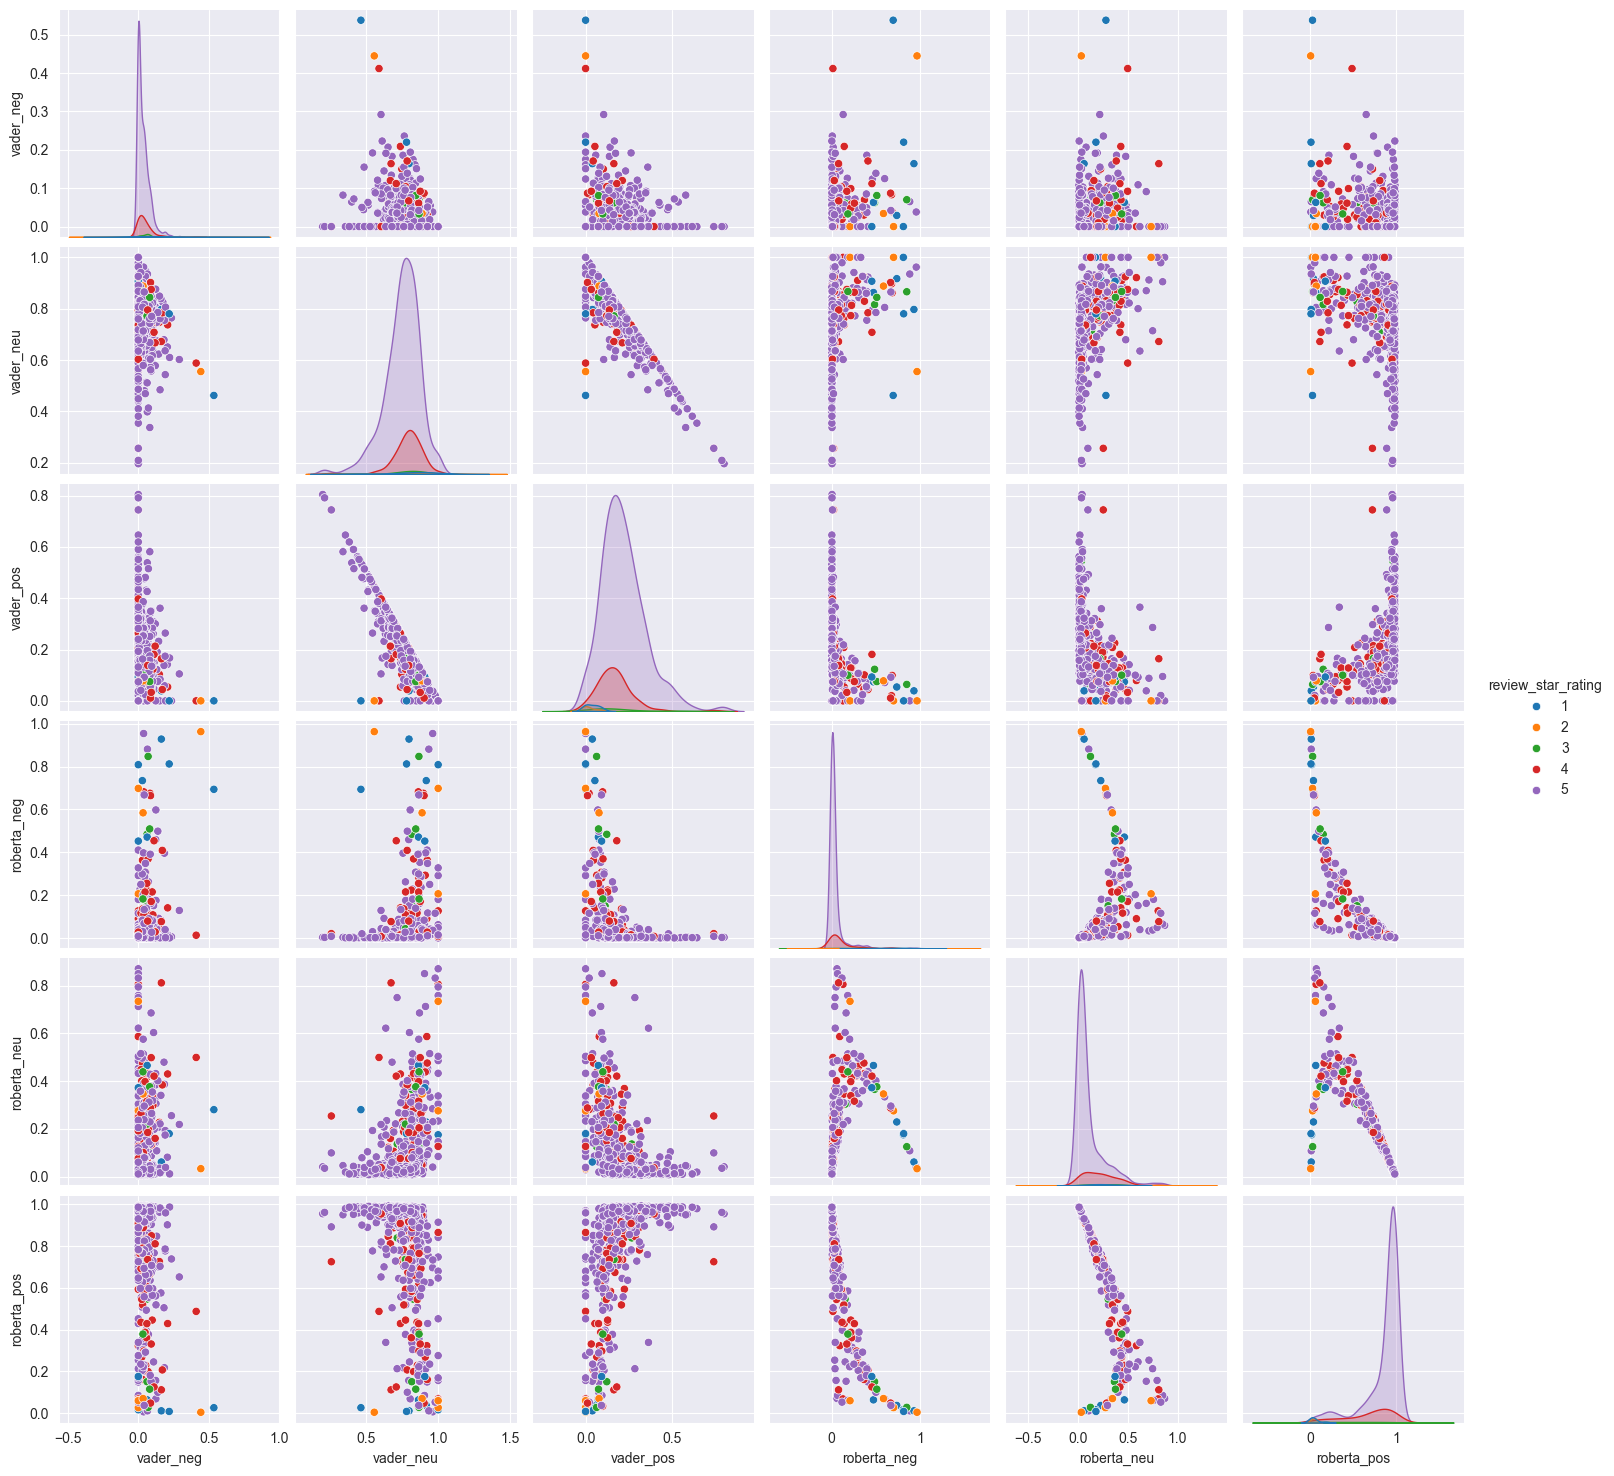

In [41]:
sns.pairplot(data = results_df, vars = ['vader_neg', 'vader_neu', 'vader_pos', 'roberta_neg', 'roberta_neu', 'roberta_pos'],
             hue = 'review_star_rating', palette = 'tab10')
plt.show()

### Step 4: Review Examples
- Positive 1-Star and Negative 5-Star Reviews
- Lets look at some examples where the model scoring and review score differ the most.

In [42]:
results_df.query('review_star_rating == 1').sort_values('roberta_pos', ascending = False)['comment'].values[5]

"This is the 2nd remote I've purchased that hasn't worked. The 1st one was generic and cheap. Didn't work at all. Bought this one. Roku remote for my Roku TV. It's like playing Russian roulette\u200d♀️. Lucky if it will work once, then doesn't work at all. Very disappointing. I was embarrassed to call to return ot, because my other one didn't work. I thought Amazon is probably think I'm lying. NOPE, these item's are crap. I wanted to order another one, but come on 3 remotes. No! So now I'm having to use the Roku app on my phone. Just to watch TV. RIDICULOUS! But, it's what I have to do. I'm not giving Amazon money for item's that don't work."

In [43]:
results_df.query('review_star_rating == 1').sort_values('vader_pos', ascending = False)['comment'].values[2]

'Hello\nI had bought the apple pencil from you a month and half ago. The day I received my pencil I had flew out of town and I came back on August 15th to USA. After coming when I tried to pair my pencil with my ipad pro and Ipad 10th Generation I could not pair it with either one.\nI updated my softwares om the iPad turned off turned it back on restarted the iPad 10 times Googled, and did everything I could to pair the pencil but it just did not work.\nEventually I tool it to the apple store in the mall where they said that the pencil is defective. I trusted you and threw the box even before it could pair. Please send me a replacement or refund me my full amount.'

- Negative sentiment 5-Star view

In [44]:
results_df.query('review_star_rating == 5').sort_values('roberta_neg', ascending = False)['comment'].values[7]

'My 11 year old version 1 Fire TV unit died... glad it did as this stick (tiny little thing) was dirt cheap with discount.  I bought the Ethernet adapter as I had one at my TV for the Gen 1 unit.  I plug this into my 2011 Sharp 52" 1080p TV and hook up the Ethernet connector.  Turn it on and I login to my Amazon, 30 seconds later it\'s "Hi xxx" welcome to Fire TV.  I try a few channels and they now just pop up on the screen.  The amazing thing, a lot of these programs are HD, not the crappy 640x460 that Comcast puts out.  I got the fancy stick with more memory and speech and I have downloaded Tubi and Freevee.  Only the Peter Gunn TV show is not that great quality, but hey, that is a 1959 show.  Boohoo I have to watch a few ads, but the timers come up to show how many and how long they are and they are a lot less Ads then what shows up on regular cable.  Really looking at dropping my $264 month cable.\nCan\'t believe the variety of shows as I can\'t stand these reality shows anymore.'

In [45]:
results_df.query('review_star_rating == 5').sort_values('vader_neg', ascending = False)['comment'].values[2]

'The cord is great quality and will last forever! I’ve had no problem with this cord so far!'

## The Transformers Pipeline

In [46]:
from transformers import pipeline

sentiment_pipeline = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
C:\Users\Karen Fernandes\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [47]:
sentiment_pipeline('I absolutely love this smartphone! The camera quality is outstanding, and the battery life lasts all day with heavy usage. The design is sleek, and the display is vibrant. Totally worth the price. Highly recommend!')

[{'label': 'POSITIVE', 'score': 0.9998466968536377}]

In [48]:
sentiment_pipeline('The headphones perform as expected. The sound quality is clear, and they are comfortable enough for regular use. Overall, they meet basic expectations without any standout features.')

[{'label': 'POSITIVE', 'score': 0.9949476718902588}]

In [49]:
sentiment_pipeline('Im really disappointed with this laptop. It overheats quickly and slows down when running multiple programs. The battery drains within a few hours, and the build quality feels cheap. I expected better performance for the price.')

[{'label': 'NEGATIVE', 'score': 0.9997321963310242}]